In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [401]:
from urllib.request import urlopen

In [402]:
from bs4 import BeautifulSoup

In [403]:
integer_years = list(range(1991,2024))
string_years = list(map(str, integer_years))
print(string_years)

['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [404]:
integer_years2 = list(range(1980,1991))
string_years2 = list(map(str, integer_years2))
print(string_years2)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990']


In [6]:
def scrape_advanced_stats(years):
    advanced_stats_df = pd.DataFrame(columns = ['Yr', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'])
    for year in years:
        url = 'https://www.basketball-reference.com/leagues/NBA_' + year + '_advanced.html'
        html = urlopen(url)
        soup = BeautifulSoup(html, features="lxml")
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers.remove('Rk')
        headers.insert(0, 'Yr')
        headers = list(map(lambda x: x.replace(' ', 'Blank'), headers))
        rows = soup.findAll('tr')[1:]
        rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        rows_data = list(filter(None,rows_data))
        for i in range(0, len(rows_data)):
            rows_data[i].insert(0, year)
        year_advanced_stats_df = pd.DataFrame(rows_data, columns = headers)
        year_advanced_stats_df = year_advanced_stats_df.drop(columns = '\xa0', axis = 1)
        advanced_stats_df = advanced_stats_df.append(year_advanced_stats_df)
    print(advanced_stats_df)
    advanced_stats_df.to_csv("advanced_stats2.csv", index=False)

In [7]:
scrape_advanced_stats(string_years2)

       Yr                Player Pos Age   Tm   G    MP   PER   TS%  3PAr  ...  \
0    1980  Kareem Abdul-Jabbar*   C  32  LAL  82  3143  25.3  .639  .001  ...   
1    1980         Tom Abernethy  PF  25  GSW  67  1222  11.0  .511  .003  ...   
2    1980           Alvan Adams   C  25  PHO  75  2168  19.2  .571  .002  ...   
3    1980       Tiny Archibald*  PG  31  BOS  80  2864  15.3  .574  .023  ...   
4    1980         Dennis Awtrey   C  31  CHI  26   560   7.4  .524  .000  ...   
..    ...                   ...  ..  ..  ...  ..   ...   ...   ...   ...  ...   
454  1990     Orlando Woolridge  SF  30  LAL  62  1421  17.6  .601  .009  ...   
455  1990      Haywoode Workman  PG  24  ATL   6    16  26.1  .773  .000  ...   
456  1990         James Worthy*  SF  28  LAL  80  2960  19.8  .586  .038  ...   
457  1990           Danny Young  PG  27  POR  82  1393  11.5  .508  .180  ...   
458  1990         Michael Young  SF  29  LAC  45   459  16.0  .520  .134  ...   

     TOV%  USG%  OWS  DWS  

In [30]:
scrape_advanced_stats(string_years)

       Yr              Player Pos Age   Tm   G    MP   PER   TS%  3PAr  ...  \
0    1991      Alaa Abdelnaby  PF  22  POR  43   290  13.1  .499  .000  ...   
1    1991  Mahmoud Abdul-Rauf  PG  21  DEN  67  1505  12.2  .448  .099  ...   
2    1991          Mark Acres   C  28  ORL  68  1313   9.2  .551  .014  ...   
3    1991       Michael Adams  PG  28  DEN  66  2346  22.3  .530  .397  ...   
4    1991        Mark Aguirre  SF  31  DET  78  2006  16.7  .526  .086  ...   
..    ...                 ...  ..  ..  ...  ..   ...   ...   ...   ...  ...   
674  2023      Thaddeus Young  PF  34  TOR  54   795  14.1  .573  .172  ...   
675  2023          Trae Young  PG  24  ATL  73  2541  22.0  .573  .331  ...   
676  2023      Omer Yurtseven   C  24  MIA   9    83  16.7  .675  .259  ...   
677  2023         Cody Zeller   C  30  MIA  15   217  16.4  .659  .034  ...   
678  2023         Ivica Zubac   C  25  LAC  76  2170  16.7  .661  .004  ...   

     TOV%  USG%   OWS   DWS    WS   WS/48  OBPM  DB

In [8]:
def scrape_totals_stats(years):
    totals_stats_df = pd.DataFrame(columns = ['Yr', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS'])
    for year in years:
        url = 'https://www.basketball-reference.com/leagues/NBA_' + year + '_totals.html'
        html = urlopen(url)
        soup = BeautifulSoup(html, features="lxml")
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers.remove('Rk')
        headers.insert(0, 'Yr')
        rows = soup.findAll('tr')[1:]
        rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        rows_data = list(filter(None,rows_data))
        for i in range(0, len(rows_data)):
            rows_data[i].insert(0, year)
        year_totals_stats_df = pd.DataFrame(rows_data, columns = headers)
        totals_stats_df = totals_stats_df.append(year_totals_stats_df)
    print(totals_stats_df)
    totals_stats_df.to_csv("totals_stats2.csv", index=False)

In [9]:
scrape_totals_stats(string_years2)

       Yr                Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  \
0    1980  Kareem Abdul-Jabbar*   C  32  LAL  82      3143  835  1383  ...   
1    1980         Tom Abernethy  PF  25  GSW  67      1222  153   318  ...   
2    1980           Alvan Adams   C  25  PHO  75      2168  465   875  ...   
3    1980       Tiny Archibald*  PG  31  BOS  80  80  2864  383   794  ...   
4    1980         Dennis Awtrey   C  31  CHI  26       560   27    60  ...   
..    ...                   ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   
454  1990     Orlando Woolridge  SF  30  LAL  62   2  1421  306   550  ...   
455  1990      Haywoode Workman  PG  24  ATL   6   0    16    2     3  ...   
456  1990         James Worthy*  SF  28  LAL  80  80  2960  711  1298  ...   
457  1990           Danny Young  PG  27  POR  82   8  1393  138   328  ...   
458  1990         Michael Young  SF  29  LAC  45   2   459   92   194  ...   

       FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0   

In [28]:
scrape_totals_stats(string_years)

       Yr              Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  \
0    1991      Alaa Abdelnaby  PF  22  POR  43   0   290   55   116  ...   
1    1991  Mahmoud Abdul-Rauf  PG  21  DEN  67  19  1505  417  1009  ...   
2    1991          Mark Acres   C  28  ORL  68   0  1313  109   214  ...   
3    1991       Michael Adams  PG  28  DEN  66  66  2346  560  1421  ...   
4    1991        Mark Aguirre  SF  31  DET  78  13  2006  420   909  ...   
..    ...                 ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   
674  2023      Thaddeus Young  PF  34  TOR  54   9   795  108   198  ...   
675  2023          Trae Young  PG  24  ATL  73  73  2541  597  1390  ...   
676  2023      Omer Yurtseven   C  24  MIA   9   0    83   16    27  ...   
677  2023         Cody Zeller   C  30  MIA  15   2   217   37    59  ...   
678  2023         Ivica Zubac   C  25  LAC  76  76  2170  326   514  ...   

      FT%  ORB  DRB  TRB  AST  STL BLK  TOV   PF   PTS  
0    .568   27   62   89   12 

In [10]:
def scrape_pergame_stats(years):
    pergame_stats_df = pd.DataFrame(columns = ['Yr', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS'])
    for year in years:
        url = 'https://www.basketball-reference.com/leagues/NBA_' + year + '_per_game.html'
        html = urlopen(url)
        soup = BeautifulSoup(html, features="lxml")
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers.remove('Rk')
        headers.insert(0, 'Yr')
        rows = soup.findAll('tr')[1:]
        rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        rows_data = list(filter(None,rows_data))
        for i in range(0, len(rows_data)):
            rows_data[i].insert(0, year)
        year_pergame_stats_df = pd.DataFrame(rows_data, columns = headers)
        pergame_stats_df = pergame_stats_df.append(year_pergame_stats_df)
    print(pergame_stats_df)
    pergame_stats_df.to_csv("pergame_stats2.csv", index=False)

In [11]:
scrape_pergame_stats(string_years2)

       Yr                Player Pos Age   Tm   G  GS    MP    FG   FGA  ...  \
0    1980  Kareem Abdul-Jabbar*   C  32  LAL  82      38.3  10.2  16.9  ...   
1    1980         Tom Abernethy  PF  25  GSW  67      18.2   2.3   4.7  ...   
2    1980           Alvan Adams   C  25  PHO  75      28.9   6.2  11.7  ...   
3    1980       Tiny Archibald*  PG  31  BOS  80  80  35.8   4.8   9.9  ...   
4    1980         Dennis Awtrey   C  31  CHI  26      21.5   1.0   2.3  ...   
..    ...                   ...  ..  ..  ...  ..  ..   ...   ...   ...  ...   
454  1990     Orlando Woolridge  SF  30  LAL  62   2  22.9   4.9   8.9  ...   
455  1990      Haywoode Workman  PG  24  ATL   6   0   2.7   0.3   0.5  ...   
456  1990         James Worthy*  SF  28  LAL  80  80  37.0   8.9  16.2  ...   
457  1990           Danny Young  PG  27  POR  82   8  17.0   1.7   4.0  ...   
458  1990         Michael Young  SF  29  LAC  45   2  10.2   2.0   4.3  ...   

       FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF

In [30]:
scrape_pergame_stats(string_years)

       Yr              Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  \
0    1991      Alaa Abdelnaby  PF  22  POR  43   0   6.7  1.3   2.7  ...   
1    1991  Mahmoud Abdul-Rauf  PG  21  DEN  67  19  22.5  6.2  15.1  ...   
2    1991          Mark Acres   C  28  ORL  68   0  19.3  1.6   3.1  ...   
3    1991       Michael Adams  PG  28  DEN  66  66  35.5  8.5  21.5  ...   
4    1991        Mark Aguirre  SF  31  DET  78  13  25.7  5.4  11.7  ...   
..    ...                 ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   
674  2023      Thaddeus Young  PF  34  TOR  54   9  14.7  2.0   3.7  ...   
675  2023          Trae Young  PG  24  ATL  73  73  34.8  8.2  19.0  ...   
676  2023      Omer Yurtseven   C  24  MIA   9   0   9.2  1.8   3.0  ...   
677  2023         Cody Zeller   C  30  MIA  15   2  14.5  2.5   3.9  ...   
678  2023         Ivica Zubac   C  25  LAC  76  76  28.6  4.3   6.8  ...   

      FT%  ORB  DRB  TRB   AST  STL  BLK  TOV   PF   PTS  
0    .568  0.6  1.4  2.1   0

In [12]:
def scrape_per36min_stats(years):
    per36min_stats_df = pd.DataFrame(columns = ['Yr', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS'])
    for year in years:
        url = 'https://www.basketball-reference.com/leagues/NBA_' + year + '_per_minute.html'
        html = urlopen(url)
        soup = BeautifulSoup(html, features="lxml")
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers.remove('Rk')
        headers.insert(0, 'Yr')
        rows = soup.findAll('tr')[1:]
        rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        rows_data = list(filter(None,rows_data))
        for i in range(0, len(rows_data)):
            rows_data[i].insert(0, year)
        year_per36min_stats_df = pd.DataFrame(rows_data, columns = headers)
        per36min_stats_df = per36min_stats_df.append(year_per36min_stats_df)
    print(per36min_stats_df)
    per36min_stats_df.to_csv("per36min_stats2.csv", index=False)

In [13]:
scrape_per36min_stats(string_years2)

       Yr                Player Pos Age   Tm   G  GS    MP   FG   FGA  ...  \
0    1980  Kareem Abdul-Jabbar*   C  32  LAL  82      3143  9.6  15.8  ...   
1    1980         Tom Abernethy  PF  25  GSW  67      1222  4.5   9.4  ...   
2    1980           Alvan Adams   C  25  PHO  75      2168  7.7  14.5  ...   
3    1980       Tiny Archibald*  PG  31  BOS  80  80  2864  4.8  10.0  ...   
4    1980         Dennis Awtrey   C  31  CHI  26       560  1.7   3.9  ...   
..    ...                   ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   
454  1990     Orlando Woolridge  SF  30  LAL  62   2  1421  7.8  13.9  ...   
455  1990      Haywoode Workman  PG  24  ATL   6   0    16  4.5   6.8  ...   
456  1990         James Worthy*  SF  28  LAL  80  80  2960  8.6  15.8  ...   
457  1990           Danny Young  PG  27  POR  82   8  1393  3.6   8.5  ...   
458  1990         Michael Young  SF  29  LAC  45   2   459  7.2  15.2  ...   

       FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  

In [32]:
scrape_per36min_stats(string_years)

       Yr              Player Pos Age   Tm   G  GS    MP    FG   FGA  ...  \
0    1991      Alaa Abdelnaby  PF  22  POR  43   0   290   6.8  14.4  ...   
1    1991  Mahmoud Abdul-Rauf  PG  21  DEN  67  19  1505  10.0  24.1  ...   
2    1991          Mark Acres   C  28  ORL  68   0  1313   3.0   5.9  ...   
3    1991       Michael Adams  PG  28  DEN  66  66  2346   8.6  21.8  ...   
4    1991        Mark Aguirre  SF  31  DET  78  13  2006   7.5  16.3  ...   
..    ...                 ...  ..  ..  ...  ..  ..   ...   ...   ...  ...   
674  2023      Thaddeus Young  PF  34  TOR  54   9   795   4.9   9.0  ...   
675  2023          Trae Young  PG  24  ATL  73  73  2541   8.5  19.7  ...   
676  2023      Omer Yurtseven   C  24  MIA   9   0    83   6.9  11.7  ...   
677  2023         Cody Zeller   C  30  MIA  15   2   217   6.1   9.8  ...   
678  2023         Ivica Zubac   C  25  LAC  76  76  2170   5.4   8.5  ...   

      FT%  ORB  DRB   TRB   AST  STL  BLK  TOV   PF   PTS  
0    .568  3.4 

In [9]:
def scrape_per100pos_stats(years):
    per100pos_stats_df = pd.DataFrame(columns = ['Yr', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS', 'ORtg', 'DRtg'])
    for year in years:
        url = 'https://www.basketball-reference.com/leagues/NBA_' + year + '_per_poss.html'
        html = urlopen(url)
        soup = BeautifulSoup(html, features="lxml")
        headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        headers.remove('Rk')
        headers.insert(0, 'Yr')
        rows = soup.findAll('tr')[1:]
        rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        rows_data = list(filter(None,rows_data))
        for i in range(0, len(rows_data)):
            rows_data[i].insert(0, year)
        year_per100pos_stats_df = pd.DataFrame(rows_data, columns = headers)
        per100pos_stats_df = per100pos_stats_df.append(year_per100pos_stats_df)
    print(per100pos_stats_df)
    per100pos_stats_df.to_csv("per100pos_stats2.csv", index=False)

In [15]:
scrape_per100pos_stats(string_years2)

       Yr                Player Pos Age   Tm   G  GS    MP    FG   FGA  ...  \
0    1980  Kareem Abdul-Jabbar*   C  32  LAL  82      3143  12.3  20.3  ...   
1    1980         Tom Abernethy  PF  25  GSW  67      1222   6.0  12.4  ...   
2    1980           Alvan Adams   C  25  PHO  75      2168   9.8  18.5  ...   
3    1980       Tiny Archibald*  PG  31  BOS  80  80  2864   6.3  13.0  ...   
4    1980         Dennis Awtrey   C  31  CHI  26       560   2.3   5.0  ...   
..    ...                   ...  ..  ..  ...  ..  ..   ...   ...   ...  ...   
454  1990     Orlando Woolridge  SF  30  LAL  62   2  1421  10.7  19.3  ...   
455  1990      Haywoode Workman  PG  24  ATL   6   0    16   6.3   9.4  ...   
456  1990         James Worthy*  SF  28  LAL  80  80  2960  12.0  21.9  ...   
457  1990           Danny Young  PG  27  POR  82   8  1393   4.6  11.0  ...   
458  1990         Michael Young  SF  29  LAC  45   2   459   9.7  20.5  ...   

      TRB   AST  STL  BLK  TOV   PF   PTS ORtg DRtg

In [34]:
scrape_per100pos_stats(string_years)

       Yr              Player Pos Age   Tm   G  GS    MP    FG   FGA  ...  \
0    1991      Alaa Abdelnaby  PF  22  POR  43   0   290   9.1  19.1  ...   
1    1991  Mahmoud Abdul-Rauf  PG  21  DEN  67  19  1505  11.7  28.3  ...   
2    1991          Mark Acres   C  28  ORL  68   0  1313   4.0   7.9  ...   
3    1991       Michael Adams  PG  28  DEN  66  66  2346  10.1  25.6  ...   
4    1991        Mark Aguirre  SF  31  DET  78  13  2006  10.9  23.7  ...   
..    ...                 ...  ..  ..  ...  ..  ..   ...   ...   ...  ...   
674  2023      Thaddeus Young  PF  34  TOR  54   9   795   6.7  12.3  ...   
675  2023          Trae Young  PG  24  ATL  73  73  2541  11.2  26.1  ...   
676  2023      Omer Yurtseven   C  24  MIA   9   0    83   9.6  16.2  ...   
677  2023         Cody Zeller   C  30  MIA  15   2   217   8.5  13.6  ...   
678  2023         Ivica Zubac   C  25  LAC  76  76  2170   7.4  11.6  ...   

      TRB   AST  STL  BLK  TOV   PF   PTS ORtg DRtg     
0    14.7   2.0  0

In [16]:
def scrape_team_data(years):
    
    teams_df = pd.DataFrame(columns = ["Year", "Team", "W", "L",
                                       "W/L%", "GB", "PS/G", "PA/G",
                                       "SRS", "Playoffs",
                                       "Losing_season"])
    
    for year in years:
        url = 'https://www.basketball-reference.com/leagues/NBA_' + year + '_standings.html'
        html = urlopen(url)
        
        soup = BeautifulSoup(html, features="lxml")
        titles = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
        
        headers = titles[1:titles.index("SRS")+1]
        
        titles = titles[titles.index("SRS")+1:]
        
        try:
            row_titles = titles[0:titles.index("Eastern Conference")]
        except: row_titles = titles
        for i in headers:
            row_titles.remove(i)
        row_titles.remove("Western Conference")
        divisions = ["Atlantic Division", "Central Division",
                     "Southeast Division", "Northwest Division",
                     "Pacific Division", "Southwest Division",
                     "Midwest Division"]
        for d in divisions:
            try:
                row_titles.remove(d)
            except:
                continue
        
        rows = soup.findAll('tr')[1:]
        team_stats = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        team_stats = [e for e in team_stats if e != []]
        team_stats = team_stats[0:len(row_titles)]
        
        for i in range(0, len(team_stats)):
            team_stats[i].insert(0, row_titles[i])
            team_stats[i].insert(0, year)
            
        headers.insert(0, "Team")
        headers.insert(0, "Year")
        
        year_standings = pd.DataFrame(team_stats, columns = headers)
        
        year_standings["Playoffs"] = ["Y" if "*" in ele else "N" for ele in year_standings["Team"]]
        year_standings["Team"] = [ele.replace('*', '') for ele in year_standings["Team"]]
        year_standings["Losing_season"] = ["Y" if float(ele) < .5 else "N" for ele in year_standings["W/L%"]]
        
        teams_df = teams_df.append(year_standings)
        
    teams_df.to_csv("teams_data2.csv", index=False)

In [17]:
scrape_team_data(string_years2)

In [50]:
scrape_team_data(string_years)

In [18]:
'Next step is to consolidate all seasons for each scrape'

'Next step is to consolidate all seasons for each scrape'

In [108]:
advanced_stats1 = pd.read_csv('advanced_stats.csv')
advanced_stats2 = pd.read_csv('advanced_stats2.csv')
advanced_stats_combined = pd.concat([advanced_stats1, advanced_stats2], ignore_index=True, axis=0)
advanced_stats_combined.to_csv("advanced_stats_combined.csv", index = False)

FileNotFoundError: [Errno 2] No such file or directory: 'advanced_stats.csv'

In [107]:
advanced_stats_combined

NameError: name 'advanced_stats_combined' is not defined

In [23]:
totals_stats1 = pd.read_csv('totals_stats.csv')
totals_stats2 = pd.read_csv('totals_stats2.csv')
totals_stats_combined = pd.concat([totals_stats1, totals_stats2], ignore_index=True, axis=0)
totals_stats_combined.to_csv("totals_stats_combined.csv", index = False)

In [24]:
totals_stats_combined

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,0.568,27,62,89,12,4,12,22,39,135
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,1505,417,1009,...,0.857,34,87,121,206,55,4,110,149,942
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,0.653,140,219,359,25,25,25,42,218,285
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,0.879,58,198,256,693,147,6,240,162,1752
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,0.757,134,240,374,139,47,20,128,209,1104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,0.733,49,136,185,96,39,46,73,160,788
23142,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,1.000,0,3,3,2,3,0,0,3,6
23143,1990,James Worthy*,SF,28,LAL,80,80.0,2960,711,1298,...,0.782,160,318,478,288,99,49,160,190,1685
23144,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,0.813,29,93,122,231,82,4,80,84,383


In [25]:
pergame_stats1 = pd.read_csv('pergame_stats.csv')
pergame_stats2 = pd.read_csv('pergame_stats2.csv')
pergame_stats_combined = pd.concat([pergame_stats1, pergame_stats2], ignore_index=True, axis=0)
pergame_stats_combined.to_csv("pergame_stats_combined.csv", index = False)

In [27]:
pergame_stats_combined

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,6.7,1.3,2.7,...,0.568,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,22.5,6.2,15.1,...,0.857,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1
2,1991,Mark Acres,C,28,ORL,68,0.0,19.3,1.6,3.1,...,0.653,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2
3,1991,Michael Adams,PG,28,DEN,66,66.0,35.5,8.5,21.5,...,0.879,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5
4,1991,Mark Aguirre,SF,31,DET,78,13.0,25.7,5.4,11.7,...,0.757,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,1990,Orlando Woolridge,SF,30,LAL,62,2.0,22.9,4.9,8.9,...,0.733,0.8,2.2,3.0,1.5,0.6,0.7,1.2,2.6,12.7
23142,1990,Haywoode Workman,PG,24,ATL,6,0.0,2.7,0.3,0.5,...,1.000,0.0,0.5,0.5,0.3,0.5,0.0,0.0,0.5,1.0
23143,1990,James Worthy*,SF,28,LAL,80,80.0,37.0,8.9,16.2,...,0.782,2.0,4.0,6.0,3.6,1.2,0.6,2.0,2.4,21.1
23144,1990,Danny Young,PG,27,POR,82,8.0,17.0,1.7,4.0,...,0.813,0.4,1.1,1.5,2.8,1.0,0.0,1.0,1.0,4.7


In [28]:
per36min_stats1 = pd.read_csv('per36min_stats.csv')
per36min_stats2 = pd.read_csv('per36min_stats2.csv')
per36min_stats_combined = pd.concat([per36min_stats1, per36min_stats2], ignore_index=True, axis=0)
per36min_stats_combined.to_csv("per36min_stats_combined.csv", index = False)

In [29]:
per36min_stats_combined

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,6.8,14.4,...,0.568,3.4,7.7,11.0,1.5,0.5,1.5,2.7,4.8,16.8
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,1505,10.0,24.1,...,0.857,0.8,2.1,2.9,4.9,1.3,0.1,2.6,3.6,22.5
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,3.0,5.9,...,0.653,3.8,6.0,9.8,0.7,0.7,0.7,1.2,6.0,7.8
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,8.6,21.8,...,0.879,0.9,3.0,3.9,10.6,2.3,0.1,3.7,2.5,26.9
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,7.5,16.3,...,0.757,2.4,4.3,6.7,2.5,0.8,0.4,2.3,3.8,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,7.8,13.9,...,0.733,1.2,3.4,4.7,2.4,1.0,1.2,1.8,4.1,20.0
23142,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,4.5,6.8,...,1.000,0.0,6.8,6.8,4.5,6.8,0.0,0.0,6.8,13.5
23143,1990,James Worthy*,SF,28,LAL,80,80.0,2960,8.6,15.8,...,0.782,1.9,3.9,5.8,3.5,1.2,0.6,1.9,2.3,20.5
23144,1990,Danny Young,PG,27,POR,82,8.0,1393,3.6,8.5,...,0.813,0.7,2.4,3.2,6.0,2.1,0.1,2.1,2.2,9.9


In [30]:
per100pos_stats1 = pd.read_csv('per100pos_stats.csv')
per100pos_stats2 = pd.read_csv('per100pos_stats2.csv')
per100pos_stats_combined = pd.concat([per100pos_stats1, per100pos_stats2], ignore_index=True, axis=0)
per100pos_stats_combined.to_csv("per100pos_stats_combined.csv", index = False)

In [31]:
per100pos_stats_combined

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,Unnamed: 31
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,9.1,19.1,...,14.7,2.0,0.7,2.0,3.6,6.4,22.2,99.0,103.0,NaN
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,1505,11.7,28.3,...,3.4,5.8,1.5,0.1,3.1,4.2,26.4,96.0,118.0,NaN
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,4.0,7.9,...,13.2,0.9,0.9,0.9,1.5,8.0,10.5,116.0,109.0,NaN
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,10.1,25.6,...,4.6,12.5,2.6,0.1,4.3,2.9,31.5,113.0,115.0,NaN
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,10.9,23.7,...,9.7,3.6,1.2,0.5,3.3,5.4,28.7,109.0,105.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23141,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,10.7,19.3,...,6.5,3.4,1.4,1.6,2.6,5.6,27.6,118.0,108.0,NaN
23142,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,6.3,9.4,...,9.4,6.3,9.4,0.0,0.0,9.4,18.8,175.0,94.0,NaN
23143,1990,James Worthy*,SF,28,LAL,80,80.0,2960,12.0,21.9,...,8.0,4.8,1.7,0.8,2.7,3.2,28.4,119.0,108.0,NaN
23144,1990,Danny Young,PG,27,POR,82,8.0,1393,4.6,11.0,...,4.1,7.8,2.8,0.1,2.7,2.8,12.9,109.0,105.0,NaN


In [32]:
teams_data1 = pd.read_csv('teams_data.csv')
teams_data2 = pd.read_csv('teams_data2.csv')
teams_data_combined = pd.concat([teams_data1, teams_data2], ignore_index=True, axis=0)
teams_data_combined.to_csv("teams_data_combined.csv", index = False)

In [33]:
teams_data_combined

,Year,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Playoffs,Losing_season
0,1991,Boston Celtics,56,26,0.683,—,111.5,105.7,5.22,Y,N
1,1991,Philadelphia 76ers,44,38,0.537,12.0,105.4,105.6,-0.39,Y,N
2,1991,New York Knicks,39,43,0.476,17.0,103.1,103.3,-0.43,Y,Y
3,1991,Washington Bullets,30,52,0.366,26.0,101.4,106.4,-4.84,N,Y
4,1991,New Jersey Nets,26,56,0.317,30.0,102.9,107.5,-4.53,N,Y
...,...,...,...,...,...,...,...,...,...,...,...
1219,1990,Phoenix Suns,54,28,0.659,9.0,114.9,107.8,7.09,Y,N
1220,1990,Seattle SuperSonics,41,41,0.500,22.0,106.9,105.9,1.40,N,N
1221,1990,Golden State Warriors,37,45,0.451,26.0,116.3,119.4,-2.55,N,Y
1222,1990,Los Angeles Clippers,30,52,0.366,33.0,103.8,107.2,-2.80,N,Y


In [ ]:
'Next step is to scrape awards data for MVP and DPOY for those seasons'

In [62]:
def scrape_mvps(years):
    mvps_df = pd.DataFrame(columns = ['Yr', 'Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Share', 'G','MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48'])
    for year in years:
        url = 'https://www.basketball-reference.com/awards/awards_' + year + '.html'
        html = urlopen(url)
        soup = BeautifulSoup(html, features="lxml")
        table = soup.findAll('table')[0]
        headers = [th.getText() for th in table.findAll('tr', limit=2)[1].findAll('th')]
        headers.insert(0, 'Yr')
        rows = table.findAll('tr')[1:]
        rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]
        rows_data = list(filter(None,rows_data))
        for i in range(0, len(rows_data)):
            rows_data[i].insert(0, year)
            rows_data[i].insert(1, i+1)
        
        year_mvps_df = pd.DataFrame(rows_data, columns = headers)
        mvps_df = mvps_df.append(year_mvps_df)
        
    mvps_df.to_csv("mvps2.csv", index=False)

In [61]:
scrape_mvps(string_years)

In [63]:
scrape_mvps(string_years2)

In [8]:
mvps_data1 = pd.read_csv('mvps.csv')
mvps_data2 = pd.read_csv('mvps2.csv')
mvps_data_combined = pd.concat([mvps_data1, mvps_data2], ignore_index=True, axis=0)
mvps_data_combined.to_csv("mvps_data_combined.csv", index = False)

In [10]:
dpoy_df = pd.read_csv('/Users/mitchellren/Downloads/dpoy_data.csv')
dpoy_df

,Yr,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,STL,BLK,FG%,3P%,FT%,WS,WS/48,DWS,DBPM,DRtg
0,1991,1,Dennis Rodman,29,DET,51,51,96,0.531,82,...,0.8,0.7,0.493,0.200,0.631,8.7,0.151,5.2,0.7,101
1,1991,2,David Robinson,25,SAS,18,18,96,0.188,82,...,1.5,3.9,0.552,0.143,0.762,17.0,0.264,7.6,3.3,96
2,1991,3,Alvin Robertson,28,MIL,15,15,96,0.156,81,...,3.0,0.2,0.485,0.365,0.757,7.7,0.142,4.3,2.8,103
3,1991,4,Joe Dumars,27,DET,3,3,96,0.031,80,...,1.1,0.1,0.481,0.311,0.890,9.9,0.155,3.1,0.1,108
4,1991,5,Hakeem Olajuwon,28,HOU,2,2,96,0.021,56,...,2.2,3.9,0.508,0.000,0.769,8.6,0.201,5.7,4.0,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,1983,2,Tree Rollins,27,ATL,10,10,75,0.133,80,...,0.6,4.3,0.510,0.000,0.726,7.3,0.142,5.0,3.7,97
571,1983,3,Larry Bird,26,BOS,6,6,75,0.080,79,...,1.9,0.9,0.504,0.286,0.840,14.0,0.225,5.6,2.1,98
572,1983,4,Maurice Cheeks,26,PHI,6,6,75,0.080,79,...,2.3,0.4,0.542,0.167,0.754,9.4,0.183,3.8,2.3,101
573,1983,5,Michael Cooper,26,LAL,6,6,75,0.080,82,...,1.4,0.6,0.535,0.238,0.785,5.2,0.116,2.1,1.5,105


In [11]:
dpoy_df.to_csv("dpoy_data_combined.csv", index = False)

In [35]:
'Next step is to join all the separate files together using players, years, and teams as joinkeys'

'Next step is to join all the separate files together using players, years, and teams as joinkeys'

In [405]:
# Subset dataframes to be 1983-2023 because DPOY didn't start until 1983

mvps_df = pd.read_csv('mvps_data_combined.csv')
advanced_stats_df = pd.read_csv('advanced_stats_combined.csv')
per100pos_df = pd.read_csv('per100pos_stats_combined.csv')
per36min_df = pd.read_csv('per36min_stats_combined.csv')
pergame_df = pd.read_csv('pergame_stats_combined.csv')
teams_df = pd.read_csv('teams_data_combined.csv')
totals_stats_df = pd.read_csv('totals_stats_combined.csv')

In [406]:
mvps_df = mvps_df[mvps_df['Yr'] >= 1983]

In [407]:
mvps_df['Yr'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990])

In [408]:
advanced_stats_df = advanced_stats_df[advanced_stats_df['Yr'] >= 1983]

In [409]:
advanced_stats_df['Yr'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990])

In [410]:
per100pos_df = per100pos_df[per100pos_df['Yr'] >= 1983]

In [411]:
per100pos_df['Yr'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990])

In [412]:
per36min_df = per36min_df[per36min_df['Yr'] >= 1983]

In [413]:
per36min_df['Yr'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990])

In [414]:
pergame_df = pergame_df[pergame_df['Yr'] >= 1983]

In [415]:
pergame_df['Yr'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990])

In [416]:
teams_df = teams_df[teams_df['Year'] >= 1983]

In [417]:
teams_df['Year'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990])

In [418]:
totals_stats_df = totals_stats_df[totals_stats_df['Yr'] >= 1983]

In [419]:
totals_stats_df['Yr'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990])

In [420]:
totals_stats_df['joinkey'] = totals_stats_df['Player'] + totals_stats_df['Yr'].astype(str) + totals_stats_df['Tm'] + totals_stats_df['Pos'] + totals_stats_df['Age'].astype(str)

In [421]:
totals_stats_joinkeys = list(totals_stats_df['joinkey'])

In [422]:
advanced_stats_df['joinkey'] = advanced_stats_df['Player'] + advanced_stats_df['Yr'].astype(str) + advanced_stats_df['Tm'] + advanced_stats_df['Pos'] + advanced_stats_df['Age'].astype(str)

In [423]:
advanced_stats_joinkeys = list(advanced_stats_df['joinkey'])

In [424]:
check =  all(item in totals_stats_joinkeys for item in advanced_stats_joinkeys)
 
if check is True:
    print("All joinkeys present in both datasets")    
else :
    print("Not all joinkeys present in both datasets")

All joinkeys present in both datasets


In [425]:
totals_stats_df.columns

Index(['Yr', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'joinkey'],
      dtype='object')

In [426]:
advanced_stats_df.columns

Index(['Yr', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'joinkey'],
      dtype='object')

In [427]:
advanced_stats_remove_cols = ['Age', 'Pos', 'Yr', 'Player', 'Tm', 'G', 'MP']

In [428]:
advanced_stats_df = advanced_stats_df.drop(advanced_stats_remove_cols, axis = 1)

In [429]:
advanced_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22053 entries, 0 to 23145
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PER      22048 non-null  float64
 1   TS%      21947 non-null  float64
 2   3PAr     21934 non-null  float64
 3   FTr      21934 non-null  float64
 4   ORB%     22048 non-null  float64
 5   DRB%     22048 non-null  float64
 6   TRB%     22048 non-null  float64
 7   AST%     22048 non-null  float64
 8   STL%     22048 non-null  float64
 9   BLK%     22048 non-null  float64
 10  TOV%     21965 non-null  float64
 11  USG%     22048 non-null  float64
 12  OWS      22053 non-null  float64
 13  DWS      22053 non-null  float64
 14  WS       22053 non-null  float64
 15  WS/48    22048 non-null  float64
 16  OBPM     22053 non-null  float64
 17  DBPM     22053 non-null  float64
 18  BPM      22053 non-null  float64
 19  VORP     22053 non-null  float64
 20  joinkey  22053 non-null  object 
dtypes: float64(2

In [430]:
totals_and_advanced_df = totals_stats_df.merge(advanced_stats_df, on = 'joinkey', how = 'left')
totals_and_advanced_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,14.0,22.1,0.0,0.5,0.5,0.079,-3.4,-1.2,-4.6,-0.2
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,1505,417,1009,...,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-2.0,-3.0,-5.0,-1.1
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,14.0,9.3,1.4,1.1,2.5,0.090,-2.8,-0.2,-3.0,-0.3
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,12.7,28.5,5.8,0.4,6.3,0.128,6.0,-0.7,5.3,4.3
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,10.9,25.7,2.8,2.7,5.5,0.132,1.2,0.2,1.4,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22048,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,10.0,21.9,3.3,1.5,4.8,0.161,1.3,0.2,1.5,1.3
22049,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,0.0,10.2,0.1,0.0,0.1,0.357,-0.2,13.8,13.6,0.1
22050,1990,James Worthy*,SF,28,LAL,80,80.0,2960,711,1298,...,10.0,23.0,7.5,3.1,10.6,0.172,3.6,0.2,3.8,4.3
22051,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,17.5,12.9,1.0,1.9,3.0,0.103,-1.2,2.1,0.9,1.0


In [431]:
per100pos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22053 entries, 0 to 23145
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Yr           22053 non-null  int64  
 1   Player       22053 non-null  object 
 2   Pos          22053 non-null  object 
 3   Age          22053 non-null  int64  
 4   Tm           22053 non-null  object 
 5   G            22053 non-null  int64  
 6   GS           22053 non-null  float64
 7   MP           22053 non-null  int64  
 8   FG           22048 non-null  float64
 9   FGA          22048 non-null  float64
 10  FG%          21934 non-null  float64
 11  3P           22048 non-null  float64
 12  3PA          22048 non-null  float64
 13  3P%          18518 non-null  float64
 14  2P           22048 non-null  float64
 15  2PA          22048 non-null  float64
 16  2P%          21857 non-null  float64
 17  FT           22048 non-null  float64
 18  FTA          22048 non-null  float64
 19  FT% 

In [432]:
per100pos_stats_remove_cols = ['Age', 'Pos', 'Yr', 'Player', 'Tm', 'G', 'GS', 'MP', 'Unnamed: 31']

In [433]:
per100pos_df = per100pos_df.rename(columns={"FG": "FGper100pos", "FGA": "FGAper100pos", "FG%": "FG%per100pos", 
                             "3P": "3Pper100pos", "3PA": "3PAper100pos", "3P%": "3P%per100pos",
                            "2P": "2Pper100pos", "2PA": "2PAper100pos", "2P%": "2P%per100pos",
                            "FT": "FTper100pos", "FTA": "FTAper100pos", "FT%": "FT%per100pos",
                            "ORB": "ORBper100pos", "DRB": "DRBper100pos", "TRB": "TRBper100pos",
                            "AST": "ASTper100pos", "STL": "STLper100pos", "BLK": "BLKper100pos",
                            "TOV": "TOVper100pos", "PF": "PFper100pos", "PTS": "PTSper100pos",
                            "ORtg": "ORtgper100pos", "DRtg": "DRtgper100pos"})

In [434]:
per100pos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22053 entries, 0 to 23145
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Yr             22053 non-null  int64  
 1   Player         22053 non-null  object 
 2   Pos            22053 non-null  object 
 3   Age            22053 non-null  int64  
 4   Tm             22053 non-null  object 
 5   G              22053 non-null  int64  
 6   GS             22053 non-null  float64
 7   MP             22053 non-null  int64  
 8   FGper100pos    22048 non-null  float64
 9   FGAper100pos   22048 non-null  float64
 10  FG%per100pos   21934 non-null  float64
 11  3Pper100pos    22048 non-null  float64
 12  3PAper100pos   22048 non-null  float64
 13  3P%per100pos   18518 non-null  float64
 14  2Pper100pos    22048 non-null  float64
 15  2PAper100pos   22048 non-null  float64
 16  2P%per100pos   21857 non-null  float64
 17  FTper100pos    22048 non-null  float64
 18  FTAper

In [435]:
per100pos_df['joinkey'] = per100pos_df['Player'] + per100pos_df['Yr'].astype(str) + per100pos_df['Tm'] + per100pos_df['Pos'] + per100pos_df['Age'].astype(str)

In [436]:
per100pos_df = per100pos_df.drop(per100pos_stats_remove_cols, axis = 1)

In [437]:
per100pos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22053 entries, 0 to 23145
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FGper100pos    22048 non-null  float64
 1   FGAper100pos   22048 non-null  float64
 2   FG%per100pos   21934 non-null  float64
 3   3Pper100pos    22048 non-null  float64
 4   3PAper100pos   22048 non-null  float64
 5   3P%per100pos   18518 non-null  float64
 6   2Pper100pos    22048 non-null  float64
 7   2PAper100pos   22048 non-null  float64
 8   2P%per100pos   21857 non-null  float64
 9   FTper100pos    22048 non-null  float64
 10  FTAper100pos   22048 non-null  float64
 11  FT%per100pos   21033 non-null  float64
 12  ORBper100pos   22048 non-null  float64
 13  DRBper100pos   22048 non-null  float64
 14  TRBper100pos   22048 non-null  float64
 15  ASTper100pos   22048 non-null  float64
 16  STLper100pos   22048 non-null  float64
 17  BLKper100pos   22048 non-null  float64
 18  TOVper

In [438]:
totals_and_advanced_and_per100pos_df = totals_and_advanced_df.merge(per100pos_df, on = 'joinkey', how = 'left')
totals_and_advanced_and_per100pos_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRBper100pos,TRBper100pos,ASTper100pos,STLper100pos,BLKper100pos,TOVper100pos,PFper100pos,PTSper100pos,ORtgper100pos,DRtgper100pos
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,10.2,14.7,2.0,0.7,2.0,3.6,6.4,22.2,99.0,103.0
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,1505,417,1009,...,2.4,3.4,5.8,1.5,0.1,3.1,4.2,26.4,96.0,118.0
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,8.0,13.2,0.9,0.9,0.9,1.5,8.0,10.5,116.0,109.0
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,3.6,4.6,12.5,2.6,0.1,4.3,2.9,31.5,113.0,115.0
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,6.2,9.7,3.6,1.2,0.5,3.3,5.4,28.7,109.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22048,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,4.8,6.5,3.4,1.4,1.6,2.6,5.6,27.6,118.0,108.0
22049,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,9.4,9.4,6.3,9.4,0.0,0.0,9.4,18.8,175.0,94.0
22050,1990,James Worthy*,SF,28,LAL,80,80.0,2960,711,1298,...,5.4,8.0,4.8,1.7,0.8,2.7,3.2,28.4,119.0,108.0
22051,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,3.1,4.1,7.8,2.8,0.1,2.7,2.8,12.9,109.0,105.0


In [439]:
per36min_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22053 entries, 0 to 23145
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yr      22053 non-null  int64  
 1   Player  22053 non-null  object 
 2   Pos     22053 non-null  object 
 3   Age     22053 non-null  int64  
 4   Tm      22053 non-null  object 
 5   G       22053 non-null  int64  
 6   GS      22053 non-null  float64
 7   MP      22053 non-null  int64  
 8   FG      22048 non-null  float64
 9   FGA     22048 non-null  float64
 10  FG%     21934 non-null  float64
 11  3P      22048 non-null  float64
 12  3PA     22048 non-null  float64
 13  3P%     18518 non-null  float64
 14  2P      22048 non-null  float64
 15  2PA     22048 non-null  float64
 16  2P%     21857 non-null  float64
 17  FT      22048 non-null  float64
 18  FTA     22048 non-null  float64
 19  FT%     21033 non-null  float64
 20  ORB     22048 non-null  float64
 21  DRB     22048 non-null  float64
 22

In [440]:
per36min_stats_remove_cols = ['Age', 'Pos', 'Yr', 'Player', 'Tm', 'G', 'GS', 'MP']

In [441]:
per36min_df = per36min_df.rename(columns={"FG": "FGper36min", "FGA": "FGAper36min", "FG%": "FG%per36min", 
                             "3P": "3Pper36min", "3PA": "3PAper36min", "3P%": "3P%per36min",
                            "2P": "2Pper36min", "2PA": "2PAper36min", "2P%": "2P%per36min",
                            "FT": "FTper36min", "FTA": "FTAper36min", "FT%": "FT%per36min",
                            "ORB": "ORBper36min", "DRB": "DRBper36min", "TRB": "TRBper36min",
                            "AST": "ASTper36min", "STL": "STLper36min", "BLK": "BLKper36min",
                            "TOV": "TOVper36min", "PF": "PFper36min", "PTS": "PTSper36min"})

In [442]:
per36min_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22053 entries, 0 to 23145
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Yr           22053 non-null  int64  
 1   Player       22053 non-null  object 
 2   Pos          22053 non-null  object 
 3   Age          22053 non-null  int64  
 4   Tm           22053 non-null  object 
 5   G            22053 non-null  int64  
 6   GS           22053 non-null  float64
 7   MP           22053 non-null  int64  
 8   FGper36min   22048 non-null  float64
 9   FGAper36min  22048 non-null  float64
 10  FG%per36min  21934 non-null  float64
 11  3Pper36min   22048 non-null  float64
 12  3PAper36min  22048 non-null  float64
 13  3P%per36min  18518 non-null  float64
 14  2Pper36min   22048 non-null  float64
 15  2PAper36min  22048 non-null  float64
 16  2P%per36min  21857 non-null  float64
 17  FTper36min   22048 non-null  float64
 18  FTAper36min  22048 non-null  float64
 19  FT%p

In [443]:
per36min_df['joinkey'] = per36min_df['Player'] + per36min_df['Yr'].astype(str) + per36min_df['Tm'] + per36min_df['Pos'] + per36min_df['Age'].astype(str)

In [444]:
per36min_df = per36min_df.drop(per36min_stats_remove_cols, axis = 1)
per36min_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22053 entries, 0 to 23145
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FGper36min   22048 non-null  float64
 1   FGAper36min  22048 non-null  float64
 2   FG%per36min  21934 non-null  float64
 3   3Pper36min   22048 non-null  float64
 4   3PAper36min  22048 non-null  float64
 5   3P%per36min  18518 non-null  float64
 6   2Pper36min   22048 non-null  float64
 7   2PAper36min  22048 non-null  float64
 8   2P%per36min  21857 non-null  float64
 9   FTper36min   22048 non-null  float64
 10  FTAper36min  22048 non-null  float64
 11  FT%per36min  21033 non-null  float64
 12  ORBper36min  22048 non-null  float64
 13  DRBper36min  22048 non-null  float64
 14  TRBper36min  22048 non-null  float64
 15  ASTper36min  22048 non-null  float64
 16  STLper36min  22048 non-null  float64
 17  BLKper36min  22048 non-null  float64
 18  TOVper36min  22048 non-null  float64
 19  PFpe

In [445]:
totals_and_advanced_and_per100pos_and_per36min_df = totals_and_advanced_and_per100pos_df.merge(per36min_df, on = 'joinkey', how = 'left')
totals_and_advanced_and_per100pos_and_per36min_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%per36min,ORBper36min,DRBper36min,TRBper36min,ASTper36min,STLper36min,BLKper36min,TOVper36min,PFper36min,PTSper36min
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,0.568,3.4,7.7,11.0,1.5,0.5,1.5,2.7,4.8,16.8
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,1505,417,1009,...,0.857,0.8,2.1,2.9,4.9,1.3,0.1,2.6,3.6,22.5
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,0.653,3.8,6.0,9.8,0.7,0.7,0.7,1.2,6.0,7.8
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,0.879,0.9,3.0,3.9,10.6,2.3,0.1,3.7,2.5,26.9
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,0.757,2.4,4.3,6.7,2.5,0.8,0.4,2.3,3.8,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22048,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,0.733,1.2,3.4,4.7,2.4,1.0,1.2,1.8,4.1,20.0
22049,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,1.000,0.0,6.8,6.8,4.5,6.8,0.0,0.0,6.8,13.5
22050,1990,James Worthy*,SF,28,LAL,80,80.0,2960,711,1298,...,0.782,1.9,3.9,5.8,3.5,1.2,0.6,1.9,2.3,20.5
22051,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,0.813,0.7,2.4,3.2,6.0,2.1,0.1,2.1,2.2,9.9


In [446]:
pergame_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22053 entries, 0 to 23145
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yr      22053 non-null  int64  
 1   Player  22053 non-null  object 
 2   Pos     22053 non-null  object 
 3   Age     22053 non-null  int64  
 4   Tm      22053 non-null  object 
 5   G       22053 non-null  int64  
 6   GS      22053 non-null  float64
 7   MP      22053 non-null  float64
 8   FG      22053 non-null  float64
 9   FGA     22053 non-null  float64
 10  FG%     21934 non-null  float64
 11  3P      22053 non-null  float64
 12  3PA     22053 non-null  float64
 13  3P%     18518 non-null  float64
 14  2P      22053 non-null  float64
 15  2PA     22053 non-null  float64
 16  2P%     21857 non-null  float64
 17  eFG%    21934 non-null  float64
 18  FT      22053 non-null  float64
 19  FTA     22053 non-null  float64
 20  FT%     21033 non-null  float64
 21  ORB     22053 non-null  float64
 22

In [447]:
pergame_stats_remove_cols = ['Age', 'Pos', 'Yr', 'Player', 'Tm', 'G', 'GS', 'MP']

In [448]:
pergame_df = pergame_df.rename(columns={"FG": "FGpergame", "FGA": "FGApergame", "FG%": "FG%pergame", 
                             "3P": "3Ppergame", "3PA": "3PApergame", "3P%": "3P%pergame",
                            "2P": "2Ppergame", "2PA": "2PApergame", "2P%": "2P%pergame", "eFG%": "eFG%pergame",
                            "FT": "FTpergame", "FTA": "FTApergame", "FT%": "FT%pergame",
                            "ORB": "ORBpergame", "DRB": "DRBpergame", "TRB": "TRBpergame",
                            "AST": "ASTpergame", "STL": "STLpergame", "BLK": "BLKpergame",
                            "TOV": "TOVpergame", "PF": "PFpergame", "PTS": "PTSpergame"})

In [449]:
pergame_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22053 entries, 0 to 23145
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Yr           22053 non-null  int64  
 1   Player       22053 non-null  object 
 2   Pos          22053 non-null  object 
 3   Age          22053 non-null  int64  
 4   Tm           22053 non-null  object 
 5   G            22053 non-null  int64  
 6   GS           22053 non-null  float64
 7   MP           22053 non-null  float64
 8   FGpergame    22053 non-null  float64
 9   FGApergame   22053 non-null  float64
 10  FG%pergame   21934 non-null  float64
 11  3Ppergame    22053 non-null  float64
 12  3PApergame   22053 non-null  float64
 13  3P%pergame   18518 non-null  float64
 14  2Ppergame    22053 non-null  float64
 15  2PApergame   22053 non-null  float64
 16  2P%pergame   21857 non-null  float64
 17  eFG%pergame  21934 non-null  float64
 18  FTpergame    22053 non-null  float64
 19  FTAp

In [450]:
pergame_df['joinkey'] = pergame_df['Player'] + pergame_df['Yr'].astype(str) + pergame_df['Tm'] + pergame_df['Pos'] + pergame_df['Age'].astype(str)

In [451]:
pergame_df = pergame_df.drop(pergame_stats_remove_cols, axis = 1)
pergame_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22053 entries, 0 to 23145
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FGpergame    22053 non-null  float64
 1   FGApergame   22053 non-null  float64
 2   FG%pergame   21934 non-null  float64
 3   3Ppergame    22053 non-null  float64
 4   3PApergame   22053 non-null  float64
 5   3P%pergame   18518 non-null  float64
 6   2Ppergame    22053 non-null  float64
 7   2PApergame   22053 non-null  float64
 8   2P%pergame   21857 non-null  float64
 9   eFG%pergame  21934 non-null  float64
 10  FTpergame    22053 non-null  float64
 11  FTApergame   22053 non-null  float64
 12  FT%pergame   21033 non-null  float64
 13  ORBpergame   22053 non-null  float64
 14  DRBpergame   22053 non-null  float64
 15  TRBpergame   22053 non-null  float64
 16  ASTpergame   22053 non-null  float64
 17  STLpergame   22053 non-null  float64
 18  BLKpergame   22053 non-null  float64
 19  TOVp

In [452]:
totals_and_advanced_and_per100pos_and_per36min_and_pergame_df = totals_and_advanced_and_per100pos_and_per36min_df.merge(pergame_df, on = 'joinkey', how = 'left')
totals_and_advanced_and_per100pos_and_per36min_and_pergame_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%pergame,ORBpergame,DRBpergame,TRBpergame,ASTpergame,STLpergame,BLKpergame,TOVpergame,PFpergame,PTSpergame
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,0.568,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,1505,417,1009,...,0.857,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,0.653,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,0.879,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,0.757,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22048,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,0.733,0.8,2.2,3.0,1.5,0.6,0.7,1.2,2.6,12.7
22049,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,1.000,0.0,0.5,0.5,0.3,0.5,0.0,0.0,0.5,1.0
22050,1990,James Worthy*,SF,28,LAL,80,80.0,2960,711,1298,...,0.782,2.0,4.0,6.0,3.6,1.2,0.6,2.0,2.4,21.1
22051,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,0.813,0.4,1.1,1.5,2.8,1.0,0.0,1.0,1.0,4.7


In [453]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 0 to 1223
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           1156 non-null   int64  
 1   Team           1156 non-null   object 
 2   W              1156 non-null   int64  
 3   L              1156 non-null   int64  
 4   W/L%           1156 non-null   float64
 5   GB             1156 non-null   object 
 6   PS/G           1156 non-null   float64
 7   PA/G           1156 non-null   float64
 8   SRS            1156 non-null   float64
 9   Playoffs       1156 non-null   object 
 10  Losing_season  1156 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 108.4+ KB


In [454]:
teams_list = list(teams_df['Team'].unique())
teams_list

['Boston Celtics',
 'Philadelphia 76ers',
 'New York Knicks',
 'Washington Bullets',
 'New Jersey Nets',
 'Miami Heat',
 'Chicago Bulls',
 'Detroit Pistons',
 'Milwaukee Bucks',
 'Atlanta Hawks',
 'Indiana Pacers',
 'Cleveland Cavaliers',
 'Charlotte Hornets',
 'San Antonio Spurs',
 'Utah Jazz',
 'Houston Rockets',
 'Orlando Magic',
 'Minnesota Timberwolves',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Portland Trail Blazers',
 'Los Angeles Lakers',
 'Phoenix Suns',
 'Golden State Warriors',
 'Seattle SuperSonics',
 'Los Angeles Clippers',
 'Sacramento Kings',
 'Toronto Raptors',
 'Vancouver Grizzlies',
 'Washington Wizards',
 'Memphis Grizzlies',
 'New Orleans Hornets',
 'Charlotte Bobcats',
 'New Orleans/Oklahoma City Hornets',
 'Oklahoma City Thunder',
 'Brooklyn Nets',
 'New Orleans Pelicans',
 'Milwaukee Bucks\xa0(1)\xa0',
 'Boston Celtics\xa0(2)\xa0',
 'Philadelphia 76ers\xa0(3)\xa0',
 'Cleveland Cavaliers\xa0(4)\xa0',
 'New York Knicks\xa0(5)\xa0',
 'Brooklyn Nets\xa0(6)\xa0',
 'M

In [455]:
teams_df[teams_df['Team'] == 'Charlotte Hornets']

,Year,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Playoffs,Losing_season
12,1991,Charlotte Hornets,26,56,0.317,35.0,102.8,108.0,-4.95,N,Y
40,1992,Charlotte Hornets,31,51,0.378,36.0,109.5,113.4,-3.57,N,Y
63,1993,Charlotte Hornets,44,38,0.537,13.0,110.1,110.4,-0.02,Y,N
92,1994,Charlotte Hornets,41,41,0.500,16.0,106.5,106.7,-0.23,N,N
116,1995,Charlotte Hornets,50,32,0.610,2.0,100.6,97.3,2.87,Y,N
147,1996,Charlotte Hornets,41,41,0.500,31.0,102.8,103.4,-0.48,N,N
174,1997,Charlotte Hornets,54,28,0.659,15.0,98.9,97.0,2.13,Y,N
202,1998,Charlotte Hornets,51,31,0.622,11.0,96.6,94.6,2.45,Y,N
233,1999,Charlotte Hornets,26,24,0.520,7.0,92.9,93.0,0.63,N,N
259,2000,Charlotte Hornets,49,33,0.598,7.0,98.4,95.8,2.33,Y,N


In [456]:
stats_teams = list(totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['Tm'].unique())
stats_teams

['POR',
 'DEN',
 'ORL',
 'DET',
 'WSB',
 'DAL',
 'TOT',
 'MIL',
 'NJN',
 'PHI',
 'SAS',
 'CHI',
 'GSW',
 'MIA',
 'CLE',
 'UTA',
 'LAC',
 'SEA',
 'ATL',
 'PHO',
 'BOS',
 'CHH',
 'SAC',
 'MIN',
 'LAL',
 'HOU',
 'NYK',
 'IND',
 'VAN',
 'TOR',
 'WAS',
 'MEM',
 'NOH',
 'CHA',
 'NOK',
 'OKC',
 'BRK',
 'NOP',
 'CHO',
 'SDC',
 'KCK']

In [457]:
team_mappings= {'Boston Celtics':'BOS', 'Philadelphia 76ers':'PHI', 'New York Knicks':'NYK', 'Washington Bullets':'WSB',
'New Jersey Nets':'NJN', 'Miami Heat':'MIA', 'Chicago Bulls':'CHI', 'Detroit Pistons':'DET', 'Milwaukee Bucks':'MIL',
'Atlanta Hawks':'ATL', 'Indiana Pacers':'IND', 'Cleveland Cavaliers':'CLE', 'Charlotte Hornets':'CHA', 'San Antonio Spurs':'SAS',
'Utah Jazz':'UTA', 'Houston Rockets':'HOU', 'Orlando Magic':'ORL', 'Minnesota Timberwolves':'MIN', 'Dallas Mavericks':'DAL',
'Denver Nuggets':'DEN', 'Portland Trail Blazers':'POR', 'Los Angeles Lakers':'LAL', 'Phoenix Suns':'PHO', 'Golden State Warriors':'GSW',
'Seattle SuperSonics':'SEA', 'Los Angeles Clippers':'LAC', 'Sacramento Kings':'SAC', 'Toronto Raptors':'TOR', 'Vancouver Grizzlies':'VAN',
'Washington Wizards':'WAS', 'Memphis Grizzlies':'MEM', 'New Orleans Hornets':'NOH', 'Charlotte Bobcats':'CHA', 'New Orleans/Oklahoma City Hornets':'NOK',
'Oklahoma City Thunder':'OKC', 'Brooklyn Nets':'BRK', 'New Orleans Pelicans':'NOP', 'Milwaukee Bucks\xa0(1)\xa0':'MIL', 'Boston Celtics\xa0(2)\xa0':'BOS',
'Philadelphia 76ers\xa0(3)\xa0':'PHI', 'Cleveland Cavaliers\xa0(4)\xa0':'CLE', 'New York Knicks\xa0(5)\xa0':'NYK', 'Brooklyn Nets\xa0(6)\xa0':'BRK',
'Miami Heat\xa0(7)\xa0':'MIA', 'Atlanta Hawks\xa0(8)\xa0':'ATL', 'Toronto Raptors\xa0(9)\xa0':'TOR', 'Chicago Bulls\xa0(10)\xa0':'CHI',
'Indiana Pacers\xa0(11)\xa0':'IND', 'Washington Wizards\xa0(12)\xa0':'WAS', 'Orlando Magic\xa0(13)\xa0':'ORL', 'Charlotte Hornets\xa0(14)\xa0':'CHA',
'Detroit Pistons\xa0(15)\xa0':'DET', 'Denver Nuggets\xa0(1)\xa0':'DEN', 'Memphis Grizzlies\xa0(2)\xa0':'MEM', 'Sacramento Kings\xa0(3)\xa0':'SAC',
'Phoenix Suns\xa0(4)\xa0':'PHO', 'Los Angeles Clippers\xa0(5)\xa0':'LAC', 'Golden State Warriors\xa0(6)\xa0':'GSW', 'Los Angeles Lakers\xa0(7)\xa0':'LAL',
'Minnesota Timberwolves\xa0(8)\xa0':'MIN', 'New Orleans Pelicans\xa0(9)\xa0':'NOP', 'Oklahoma City Thunder\xa0(10)\xa0':'OKC',
'Dallas Mavericks\xa0(11)\xa0':'DAL', 'Utah Jazz\xa0(12)\xa0':'UTA', 'Portland Trail Blazers\xa0(13)\xa0':'POR', 'Houston Rockets\xa0(14)\xa0':'HOU',
'San Antonio Spurs\xa0(15)\xa0':'SAS', 'Kansas City Kings':'KCK', 'San Diego Clippers':'SDC'}

In [458]:
teams_df['Team'].map(team_mappings).unique()

array(['BOS', 'PHI', 'NYK', 'WSB', 'NJN', 'MIA', 'CHI', 'DET', 'MIL',
       'ATL', 'IND', 'CLE', 'CHA', 'SAS', 'UTA', 'HOU', 'ORL', 'MIN',
       'DAL', 'DEN', 'POR', 'LAL', 'PHO', 'GSW', 'SEA', 'LAC', 'SAC',
       'TOR', 'VAN', 'WAS', 'MEM', 'NOH', 'NOK', 'OKC', 'BRK', 'NOP',
       'KCK', 'SDC'], dtype=object)

In [459]:
teams_df['Team'] = teams_df['Team'].map(team_mappings)
teams_df['Team'].unique()

array(['BOS', 'PHI', 'NYK', 'WSB', 'NJN', 'MIA', 'CHI', 'DET', 'MIL',
       'ATL', 'IND', 'CLE', 'CHA', 'SAS', 'UTA', 'HOU', 'ORL', 'MIN',
       'DAL', 'DEN', 'POR', 'LAL', 'PHO', 'GSW', 'SEA', 'LAC', 'SAC',
       'TOR', 'VAN', 'WAS', 'MEM', 'NOH', 'NOK', 'OKC', 'BRK', 'NOP',
       'KCK', 'SDC'], dtype=object)

In [460]:
totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['Tm'].unique()

array(['POR', 'DEN', 'ORL', 'DET', 'WSB', 'DAL', 'TOT', 'MIL', 'NJN',
       'PHI', 'SAS', 'CHI', 'GSW', 'MIA', 'CLE', 'UTA', 'LAC', 'SEA',
       'ATL', 'PHO', 'BOS', 'CHH', 'SAC', 'MIN', 'LAL', 'HOU', 'NYK',
       'IND', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'CHA', 'NOK', 'OKC',
       'BRK', 'NOP', 'CHO', 'SDC', 'KCK'], dtype=object)

In [461]:
extra_mappings = {'NOK':'NOP', 'CHO':'CHA', 'CHH':'CHA', 'POR':'POR', 'DEN':'DEN', 'ORL':'ORL', 
                  'DET':'DET', 'WSB':'WSB', 'DAL':'DAL', 'TOT':'TOT', 'MIL':'MIL', 'NJN':'NJN',
       'PHI':'PHI', 'SAS':'SAS', 'CHI':'CHI', 'GSW':'GSW', 'MIA':'MIA', 'CLE':'CLE', 'UTA':'UTA', 'LAC':'LAC', 'SEA':'SEA',
       'ATL':'ATL', 'PHO':'PHO', 'BOS':'BOS', 'SAC':'SAC', 'MIN':'MIN', 'LAL':'LAL', 'HOU':'HOU', 'NYK':'NYK',
       'IND':'IND', 'VAN':'VAN', 'TOR':'TOR', 'WAS':'WAS', 'MEM':'MEM', 'NOH':'NOH', 'CHA':'CHA', 'OKC':'OKC',
       'BRK':'BRK', 'NOP':'NOP', 'SDC':'SDC', 'KCK':'KCK'}

In [462]:
totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['Tm'] = totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['Tm'].map(extra_mappings)

In [463]:
teams_df['Team'] = teams_df['Team'].map(extra_mappings)
teams_df['Team'].unique()

array(['BOS', 'PHI', 'NYK', 'WSB', 'NJN', 'MIA', 'CHI', 'DET', 'MIL',
       'ATL', 'IND', 'CLE', 'CHA', 'SAS', 'UTA', 'HOU', 'ORL', 'MIN',
       'DAL', 'DEN', 'POR', 'LAL', 'PHO', 'GSW', 'SEA', 'LAC', 'SAC',
       'TOR', 'VAN', 'WAS', 'MEM', 'NOH', 'NOP', 'OKC', 'BRK', 'KCK',
       'SDC'], dtype=object)

In [464]:
totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['Tm'].unique()

array(['POR', 'DEN', 'ORL', 'DET', 'WSB', 'DAL', 'TOT', 'MIL', 'NJN',
       'PHI', 'SAS', 'CHI', 'GSW', 'MIA', 'CLE', 'UTA', 'LAC', 'SEA',
       'ATL', 'PHO', 'BOS', 'CHA', 'SAC', 'MIN', 'LAL', 'HOU', 'NYK',
       'IND', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH', 'NOP', 'OKC', 'BRK',
       'SDC', 'KCK'], dtype=object)

In [465]:
teams_df['joinkey2'] = teams_df['Year'].astype(str) + teams_df['Team']
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156 entries, 0 to 1223
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           1156 non-null   int64  
 1   Team           1156 non-null   object 
 2   W              1156 non-null   int64  
 3   L              1156 non-null   int64  
 4   W/L%           1156 non-null   float64
 5   GB             1156 non-null   object 
 6   PS/G           1156 non-null   float64
 7   PA/G           1156 non-null   float64
 8   SRS            1156 non-null   float64
 9   Playoffs       1156 non-null   object 
 10  Losing_season  1156 non-null   object 
 11  joinkey2       1156 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 117.4+ KB


In [466]:
teams_df['joinkey2']

0       1991BOS
1       1991PHI
2       1991NYK
3       1991WSB
4       1991NJN
         ...   
1219    1990PHO
1220    1990SEA
1221    1990GSW
1222    1990LAC
1223    1990SAC
Name: joinkey2, Length: 1156, dtype: object

In [467]:
totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['joinkey2'] = totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['Yr'].astype(str) + totals_and_advanced_and_per100pos_and_per36min_and_pergame_df['Tm']
totals_and_advanced_and_per100pos_and_per36min_and_pergame_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22053 entries, 0 to 22052
Columns: 118 entries, Yr to joinkey2
dtypes: float64(92), int64(21), object(5)
memory usage: 20.0+ MB


In [468]:
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df = totals_and_advanced_and_per100pos_and_per36min_and_pergame_df.merge(teams_df, on = 'joinkey2', how = 'left')
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Playoffs,Losing_season
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,POR,63.0,19.0,0.768,—,114.7,106.0,8.47,Y,N
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,1505,417,1009,...,DEN,20.0,62.0,0.244,35.0,119.9,130.8,-10.31,N,Y
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,ORL,31.0,51.0,0.378,24.0,105.9,109.9,-3.79,N,Y
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,DEN,20.0,62.0,0.244,35.0,119.9,130.8,-10.31,N,Y
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,DET,50.0,32.0,0.610,11.0,100.1,96.8,3.08,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22048,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,LAL,63.0,19.0,0.768,—,110.7,103.9,6.74,Y,N
22049,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,ATL,41.0,41.0,0.500,18.0,108.5,107.5,0.64,N,N
22050,1990,James Worthy*,SF,28,LAL,80,80.0,2960,711,1298,...,LAL,63.0,19.0,0.768,—,110.7,103.9,6.74,Y,N
22051,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,POR,59.0,23.0,0.720,4.0,114.2,107.9,6.48,Y,N


In [469]:
nulls = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df[totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Losing_season'].isnull() == True]

In [470]:
len(nulls['Tm'])

1996

In [471]:
'remove Tm = TOT because they are totals rows'

'remove Tm = TOT because they are totals rows'

In [472]:
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df[totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Tm'] != 'TOT']

In [473]:
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Playoffs,Losing_season
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,POR,63.0,19.0,0.768,—,114.7,106.0,8.47,Y,N
1,1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19.0,1505,417,1009,...,DEN,20.0,62.0,0.244,35.0,119.9,130.8,-10.31,N,Y
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,ORL,31.0,51.0,0.378,24.0,105.9,109.9,-3.79,N,Y
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,DEN,20.0,62.0,0.244,35.0,119.9,130.8,-10.31,N,Y
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,DET,50.0,32.0,0.610,11.0,100.1,96.8,3.08,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22048,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,LAL,63.0,19.0,0.768,—,110.7,103.9,6.74,Y,N
22049,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,ATL,41.0,41.0,0.500,18.0,108.5,107.5,0.64,N,N
22050,1990,James Worthy*,SF,28,LAL,80,80.0,2960,711,1298,...,LAL,63.0,19.0,0.768,—,110.7,103.9,6.74,Y,N
22051,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,POR,59.0,23.0,0.720,4.0,114.2,107.9,6.48,Y,N


In [474]:
mvps_df['Tm'] = mvps_df['Tm'].map(extra_mappings)
mvps_df['Tm'].unique()

array(['CHI', 'LAL', 'SAS', 'PHI', 'UTA', 'POR', 'PHO', 'ATL', 'BOS',
       'NYK', 'DET', 'WSB', 'HOU', 'GSW', 'CLE', 'LAC', 'IND', 'ORL',
       'SEA', 'TOT', 'DAL', 'MIA', 'SAC', 'CHA', 'MIN', 'WAS', 'TOR',
       'MIL', 'NJN', 'NOH', 'DEN', 'OKC', 'MEM', 'NOP', 'BRK', 'SDC',
       'KCK'], dtype=object)

In [475]:
mvps_df = mvps_df[mvps_df['Tm'] != 'TOT']
mvps_df

,Yr,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1991,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,...,31.5,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321
1,1991,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,...,19.4,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251
2,1991,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,...,25.6,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264
3,1991,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,...,27.6,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258
4,1991,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,...,29.0,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1990,10,Larry Bird,33,BOS,0.0,5.0,920,0.005,75,...,24.3,9.5,7.5,1.4,0.8,0.473,0.333,0.930,9.5,0.154
706,1990,11,Buck Williams,29,POR,0.0,5.0,920,0.005,82,...,13.6,9.8,1.4,0.8,0.5,0.548,0.000,0.706,8.7,0.149
707,1990,12,Clyde Drexler,27,POR,0.0,3.0,920,0.003,73,...,23.3,6.9,5.9,2.0,0.7,0.494,0.283,0.774,11.6,0.208
708,1990,13,Joe Dumars,26,DET,0.0,1.0,920,0.001,75,...,17.8,2.8,4.9,0.8,0.0,0.480,0.400,0.900,8.7,0.162


In [476]:
mvps_df['Player'] = mvps_df['Player'].str.replace('[^\w\s]', '')

In [477]:
mvps_df['joinkey3'] = mvps_df['Player'] + mvps_df['Yr'].astype(str) + mvps_df['Tm'] + mvps_df['Age'].astype(str)

In [478]:
mvps_df['joinkey3'].unique()

array(['Michael Jordan1991CHI27', 'Magic Johnson1991LAL31',
       'David Robinson1991SAS25', 'Charles Barkley1991PHI27',
       'Karl Malone1991UTA27', 'Clyde Drexler1991POR28',
       'Kevin Johnson1991PHO24', 'Dominique Wilkins1991ATL31',
       'Larry Bird1991BOS34', 'Terry Porter1991POR27',
       'Patrick Ewing1991NYK28', 'John Stockton1991UTA28',
       'Isiah Thomas1991DET29', 'Robert Parish1991BOS37',
       'Joe Dumars1991DET27', 'Bernard King1991WSB34',
       'Kenny Smith1991HOU25', 'Hakeem Olajuwon1991HOU28',
       'Tim Hardaway1991GSW24', 'Kevin McHale1991BOS33',
       'Michael Jordan1992CHI28', 'Clyde Drexler1992POR29',
       'David Robinson1992SAS26', 'Karl Malone1992UTA28',
       'Patrick Ewing1992NYK29', 'Chris Mullin1992GSW28',
       'Mark Price1992CLE27', 'Tim Hardaway1992GSW25',
       'Scottie Pippen1992CHI26', 'Dennis Rodman1992DET30',
       'Brad Daugherty1992CLE26', 'Charles Barkley1992PHI28',
       'John Stockton1992UTA29', 'Larry Bird1992BOS35',
      

In [479]:
mvp_remove_cols = ['Yr', 'Player', 'Age', 'Tm', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48']

In [480]:
mvps_df = mvps_df.drop(mvp_remove_cols, axis = 1)
mvps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 709
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      638 non-null    int64  
 1   First     638 non-null    float64
 2   Pts Won   638 non-null    float64
 3   Pts Max   638 non-null    int64  
 4   Share     638 non-null    float64
 5   joinkey3  638 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 34.9+ KB


In [481]:
mvps_df = mvps_df.rename(columns = {'Rank':'Rank-MVP', 'First':'First-MVP', 'Pts Won':'Pts Won-MVP', 'Pts Max':'Pts Max-MVP', 'Share':""'Share-MVP'})
mvps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 0 to 709
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank-MVP     638 non-null    int64  
 1   First-MVP    638 non-null    float64
 2   Pts Won-MVP  638 non-null    float64
 3   Pts Max-MVP  638 non-null    int64  
 4   Share-MVP    638 non-null    float64
 5   joinkey3     638 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 34.9+ KB


In [482]:
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Player'] = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Player'].str.replace('[^\w\s]', '')

<ipython-input-482-ce0d3d5c90bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Player'] = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Player'].str.replace('[^\w\s]', '')


In [483]:
'removed special characters from main dataset but not MVP dataset - will need to do the same for both to ensure matching'

'removed special characters from main dataset but not MVP dataset - will need to do the same for both to ensure matching'

In [484]:
list(totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Player'].unique())

['Alaa Abdelnaby',
 'Mahmoud AbdulRauf',
 'Mark Acres',
 'Michael Adams',
 'Mark Aguirre',
 'Danny Ainge',
 'Mark Alarie',
 'Steve Alford',
 'Greg Anderson',
 'Nick Anderson',
 'Ron Anderson',
 'Willie Anderson',
 'Michael Ansley',
 'BJ Armstrong',
 'Vincent Askew',
 'Keith Askins',
 'Miloš Babić',
 'Thurl Bailey',
 'Cedric Ball',
 'Ken Bannister',
 'Charles Barkley',
 'Dana Barros',
 'John Battle',
 'Kenny Battle',
 'William Bedford',
 'Benoit Benjamin',
 'Winston Bennett',
 'Larry Bird',
 'Rolando Blackman',
 'Lance Blanks',
 'Mookie Blaylock',
 'Muggsy Bogues',
 'Manute Bol',
 'Anthony Bonner',
 'Sam Bowie',
 'Randy Breuer',
 'Frank Brickowski',
 'Scott Brooks',
 'Chucky Brown',
 'Dee Brown',
 'Mike Brown',
 'Tony Brown',
 'Mark Bryant',
 'Jud Buechler',
 'Matt Bullard',
 'Willie Burton',
 'Greg Butler',
 'Michael Cage',
 'Adrian Caldwell',
 'Rick Calloway',
 'Elden Campbell',
 'Tony Campbell',
 'Antoine Carr',
 'Joe Barry Carroll',
 'Bill Cartwright',
 'Terry Catledge',
 'Duane Cau

In [485]:
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['joinkey3'] = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Player'] + totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Yr'].astype(str) + totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Tm'] + totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Age'].astype(str)

<ipython-input-485-739e1b26f921>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['joinkey3'] = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Player'] + totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Yr'].astype(str) + totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Tm'] + totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['Age'].astype(str)


In [486]:
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['joinkey3']

0           Alaa Abdelnaby1991POR22
1        Mahmoud AbdulRauf1991DEN21
2               Mark Acres1991ORL28
3            Michael Adams1991DEN28
4             Mark Aguirre1991DET31
                    ...            
22048    Orlando Woolridge1990LAL30
22049     Haywoode Workman1990ATL24
22050         James Worthy1990LAL28
22051          Danny Young1990POR27
22052        Michael Young1990LAC29
Name: joinkey3, Length: 20057, dtype: object

In [487]:
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_df = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df.merge(mvps_df, on = 'joinkey3', how = 'left')
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PA/G,SRS,Playoffs,Losing_season,joinkey3,Rank-MVP,First-MVP,Pts Won-MVP,Pts Max-MVP,Share-MVP
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,106.0,8.47,Y,N,Alaa Abdelnaby1991POR22,NaN,NaN,NaN,NaN,NaN
1,1991,Mahmoud AbdulRauf,PG,21,DEN,67,19.0,1505,417,1009,...,130.8,-10.31,N,Y,Mahmoud AbdulRauf1991DEN21,NaN,NaN,NaN,NaN,NaN
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,109.9,-3.79,N,Y,Mark Acres1991ORL28,NaN,NaN,NaN,NaN,NaN
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,130.8,-10.31,N,Y,Michael Adams1991DEN28,NaN,NaN,NaN,NaN,NaN
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,96.8,3.08,Y,N,Mark Aguirre1991DET31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20052,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,103.9,6.74,Y,N,Orlando Woolridge1990LAL30,NaN,NaN,NaN,NaN,NaN
20053,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,107.5,0.64,N,N,Haywoode Workman1990ATL24,NaN,NaN,NaN,NaN,NaN
20054,1990,James Worthy,SF,28,LAL,80,80.0,2960,711,1298,...,103.9,6.74,Y,N,James Worthy1990LAL28,NaN,NaN,NaN,NaN,NaN
20055,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,107.9,6.48,Y,N,Danny Young1990POR27,NaN,NaN,NaN,NaN,NaN


In [488]:
'removed special characters from player names - the rest are likely player mismatch spelling'

'removed special characters from player names - the rest are likely player mismatch spelling'

In [489]:
mvps_joinkeys = list(mvps_df['joinkey3'].unique())

In [490]:
fullset_joinkeys = list(totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_df['joinkey3'].unique())

In [491]:
outliers_indices = []
counter = -1

for joinkey in mvps_joinkeys:
    if joinkey not in fullset_joinkeys:
        counter += 1
        outliers_indices.append(counter)
    else:
        counter += 1

In [492]:
len(outliers_indices)

0

In [493]:
'Follow same cleaning steps for DPOY dataset'

'Follow same cleaning steps for DPOY dataset'

In [494]:
dpoy_df = pd.read_csv('dpoy_data_combined.csv')
dpoy_df

,Yr,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,STL,BLK,FG%,3P%,FT%,WS,WS/48,DWS,DBPM,DRtg
0,1991,1,Dennis Rodman,29,DET,51,51,96,0.531,82,...,0.8,0.7,0.493,0.200,0.631,8.7,0.151,5.2,0.7,101
1,1991,2,David Robinson,25,SAS,18,18,96,0.188,82,...,1.5,3.9,0.552,0.143,0.762,17.0,0.264,7.6,3.3,96
2,1991,3,Alvin Robertson,28,MIL,15,15,96,0.156,81,...,3.0,0.2,0.485,0.365,0.757,7.7,0.142,4.3,2.8,103
3,1991,4,Joe Dumars,27,DET,3,3,96,0.031,80,...,1.1,0.1,0.481,0.311,0.890,9.9,0.155,3.1,0.1,108
4,1991,5,Hakeem Olajuwon,28,HOU,2,2,96,0.021,56,...,2.2,3.9,0.508,0.000,0.769,8.6,0.201,5.7,4.0,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,1983,2,Tree Rollins,27,ATL,10,10,75,0.133,80,...,0.6,4.3,0.510,0.000,0.726,7.3,0.142,5.0,3.7,97
571,1983,3,Larry Bird,26,BOS,6,6,75,0.080,79,...,1.9,0.9,0.504,0.286,0.840,14.0,0.225,5.6,2.1,98
572,1983,4,Maurice Cheeks,26,PHI,6,6,75,0.080,79,...,2.3,0.4,0.542,0.167,0.754,9.4,0.183,3.8,2.3,101
573,1983,5,Michael Cooper,26,LAL,6,6,75,0.080,82,...,1.4,0.6,0.535,0.238,0.785,5.2,0.116,2.1,1.5,105


In [495]:
dpoy_df['Player'] = dpoy_df['Player'].str.replace('[^\w\s]', '')

In [496]:
dpoy_df = dpoy_df[dpoy_df['Yr'] >= 1983]

In [497]:
dpoy_df['Tm'] = dpoy_df['Tm'].map(extra_mappings)
dpoy_df['Tm'].unique()

array(['DET', 'SAS', 'MIL', 'HOU', 'POR', 'NYK', 'DAL', 'CHI', 'UTA',
       'PHO', 'DEN', 'SEA', 'ATL', 'IND', 'CHA', 'ORL', 'LAC', 'GSW',
       'BOS', 'MIN', 'NJN', 'CLE', 'MIA', 'PHI', 'TOT', 'LAL', 'SAC',
       'MEM', 'WAS', 'NOP', 'TOR', 'NOH', 'OKC', 'BRK', 'WSB'],
      dtype=object)

In [498]:
dpoy_df = dpoy_df[dpoy_df['Tm'] != 'TOT']
dpoy_df['Tm'].unique()

array(['DET', 'SAS', 'MIL', 'HOU', 'POR', 'NYK', 'DAL', 'CHI', 'UTA',
       'PHO', 'DEN', 'SEA', 'ATL', 'IND', 'CHA', 'ORL', 'LAC', 'GSW',
       'BOS', 'MIN', 'NJN', 'CLE', 'MIA', 'PHI', 'LAL', 'SAC', 'MEM',
       'WAS', 'NOP', 'TOR', 'NOH', 'OKC', 'BRK', 'WSB'], dtype=object)

In [499]:
dpoy_df['joinkey3'] = dpoy_df['Player'] + dpoy_df['Yr'].astype(str) + dpoy_df['Tm'] + dpoy_df['Age'].astype(str)

In [500]:
dpoy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 574
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Yr        564 non-null    int64  
 1   Rank      564 non-null    int64  
 2   Player    564 non-null    object 
 3   Age       564 non-null    int64  
 4   Tm        564 non-null    object 
 5   First     564 non-null    int64  
 6   Pts Won   564 non-null    int64  
 7   Pts Max   564 non-null    int64  
 8   Share     564 non-null    float64
 9   G         564 non-null    int64  
 10  MP        564 non-null    float64
 11  PTS       564 non-null    float64
 12  TRB       564 non-null    float64
 13  AST       564 non-null    float64
 14  STL       564 non-null    float64
 15  BLK       564 non-null    float64
 16  FG%       564 non-null    float64
 17  3P%       523 non-null    float64
 18  FT%       564 non-null    float64
 19  WS        564 non-null    float64
 20  WS/48     564 non-null    float6

In [501]:
dpoy_remove_cols = ['Yr', 'Player', 'Age', 'Tm', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'DWS', 'DBPM', 'DRtg']

In [502]:
dpoy_df = dpoy_df.drop(dpoy_remove_cols, axis = 1)
dpoy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 574
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      564 non-null    int64  
 1   First     564 non-null    int64  
 2   Pts Won   564 non-null    int64  
 3   Pts Max   564 non-null    int64  
 4   Share     564 non-null    float64
 5   joinkey3  564 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 30.8+ KB


In [503]:
dpoy_df = dpoy_df.rename(columns = {'Rank':'Rank-DPOY', 'First':'First-DPOY', 'Pts Won':'Pts won-DPOY', 'Pts Max':'Pts Max-DPOY', 'Share':'Share-DPOY'})
dpoy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 574
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank-DPOY     564 non-null    int64  
 1   First-DPOY    564 non-null    int64  
 2   Pts won-DPOY  564 non-null    int64  
 3   Pts Max-DPOY  564 non-null    int64  
 4   Share-DPOY    564 non-null    float64
 5   joinkey3      564 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 30.8+ KB


In [504]:
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_and_dpoys_df = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_df.merge(dpoy_df, on = 'joinkey3', how = 'left')
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_and_dpoys_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Rank-MVP,First-MVP,Pts Won-MVP,Pts Max-MVP,Share-MVP,Rank-DPOY,First-DPOY,Pts won-DPOY,Pts Max-DPOY,Share-DPOY
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,Mahmoud AbdulRauf,PG,21,DEN,67,19.0,1505,417,1009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20052,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20053,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20054,1990,James Worthy,SF,28,LAL,80,80.0,2960,711,1298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20055,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [505]:
dpoy_joinkeys = list(dpoy_df['joinkey3'].unique())

In [506]:
outliers_indices = []
counter = -1

for joinkey in mvps_joinkeys:
    if joinkey not in fullset_joinkeys:
        counter += 1
        outliers_indices.append(counter)
    else:
        counter += 1

In [507]:
outliers_indices

[]

In [508]:
totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_and_dpoys_df

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Rank-MVP,First-MVP,Pts Won-MVP,Pts Max-MVP,Share-MVP,Rank-DPOY,First-DPOY,Pts won-DPOY,Pts Max-DPOY,Share-DPOY
0,1991,Alaa Abdelnaby,PF,22,POR,43,0.0,290,55,116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,Mahmoud AbdulRauf,PG,21,DEN,67,19.0,1505,417,1009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991,Mark Acres,C,28,ORL,68,0.0,1313,109,214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991,Michael Adams,PG,28,DEN,66,66.0,2346,560,1421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991,Mark Aguirre,SF,31,DET,78,13.0,2006,420,909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20052,1990,Orlando Woolridge,SF,30,LAL,62,2.0,1421,306,550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20053,1990,Haywoode Workman,PG,24,ATL,6,0.0,16,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20054,1990,James Worthy,SF,28,LAL,80,80.0,2960,711,1298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20055,1990,Danny Young,PG,27,POR,82,8.0,1393,138,328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [509]:
null_columns = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_and_dpoys_df.columns[totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_and_dpoys_df.isna().any()].tolist()

In [510]:
null_columns

['FG%',
 '3P%',
 '2P%',
 'eFG%',
 'FT%',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'WS/48',
 'FGper100pos',
 'FGAper100pos',
 'FG%per100pos',
 '3Pper100pos',
 '3PAper100pos',
 '3P%per100pos',
 '2Pper100pos',
 '2PAper100pos',
 '2P%per100pos',
 'FTper100pos',
 'FTAper100pos',
 'FT%per100pos',
 'ORBper100pos',
 'DRBper100pos',
 'TRBper100pos',
 'ASTper100pos',
 'STLper100pos',
 'BLKper100pos',
 'TOVper100pos',
 'PFper100pos',
 'PTSper100pos',
 'ORtgper100pos',
 'DRtgper100pos',
 'FGper36min',
 'FGAper36min',
 'FG%per36min',
 '3Pper36min',
 '3PAper36min',
 '3P%per36min',
 '2Pper36min',
 '2PAper36min',
 '2P%per36min',
 'FTper36min',
 'FTAper36min',
 'FT%per36min',
 'ORBper36min',
 'DRBper36min',
 'TRBper36min',
 'ASTper36min',
 'STLper36min',
 'BLKper36min',
 'TOVper36min',
 'PFper36min',
 'PTSper36min',
 'FG%pergame',
 '3P%pergame',
 '2P%pergame',
 'eFG%pergame',
 'FT%pergame',
 'Rank-MVP',
 'First-MVP',
 'Pts Won-MVP',
 'Pts 

In [511]:
df = totals_and_advanced_and_per100pos_and_per36min_and_pergame_and_teams_and_mvps_and_dpoys_df

In [512]:
df[df['FG%'].isnull() == True]['FGA'].unique()

array([0])

In [513]:
FGA_checklist = ['FG%','eFG%','FGper100pos','FGAper100pos','FG%per100pos', 'FGper36min','FGAper36min','FG%per36min', 'FG%pergame','eFG%pergame']
twoPA_checklist = ['2P%', '2Pper100pos','2PAper100pos','2P%per100pos','2Pper36min','2PAper36min','2P%per36min','2P%pergame']
threePA_checklist = ['3P%', '3Pper100pos','3PAper100pos','3P%per100pos','3Pper36min','3PAper36min','3P%per36min','3P%pergame']
FT_checklist = ['FT%','FTper100pos','FTAper100pos','FT%per100pos', 'FTper36min','FTAper36min','FT%per36min']
MP_checklist = ['USG%','DRtgper100pos']
TRB_checklist = ['ORB%','DRB%','TRB%','ORBper100pos','DRBper100pos','TRBper100pos', 'ORBper36min','DRBper36min','TRBper36min']
AST_checklist = ['AST%', 'ASTper100pos', 'ASTper36min']
STL_checklist = ['STL%', 'STLper100pos', 'STLper36min']
BLK_checklist = ['BLK%', 'BLKper100pos', 'BLKper36min']
TOV_checklist = ['TOV%', 'TOVper100pos', 'TOVper36min']
PF_checklist = ['PFper100pos', 'PFper36min']
PTS_checklist = ['PTSper100pos', 'ORtgper100pos', 'PTSper36min']

In [514]:
def null_checks(df, statlist, checkstat):
    for stat in statlist:
        if list(df[df[stat].isnull() == True][checkstat].unique()) == [0]:
            continue
        else:
            list_string = ' '.join(map(str,list(df[df[stat].isnull() == True][checkstat].unique())))
            print(stat + ' line items have ' + checkstat + ' values of: ' + list_string.replace(' ', ','))

In [515]:
null_checks(df, FGA_checklist, 'FGA')

In [516]:
null_checks(df, twoPA_checklist, '2PA')

In [517]:
null_checks(df, threePA_checklist, '3PA')

In [518]:
null_checks(df, FT_checklist, 'FTA')

In [519]:
null_checks(df, MP_checklist, 'MP')

In [520]:
null_checks(df, TRB_checklist, 'TRB')

ORB% line items have TRB values of: 0,1
DRB% line items have TRB values of: 0,1
TRB% line items have TRB values of: 0,1
ORBper100pos line items have TRB values of: 0,1
DRBper100pos line items have TRB values of: 0,1
TRBper100pos line items have TRB values of: 0,1
ORBper36min line items have TRB values of: 0,1
DRBper36min line items have TRB values of: 0,1
TRBper36min line items have TRB values of: 0,1


In [521]:
null_checks(df, AST_checklist, 'AST')

In [522]:
null_checks(df, STL_checklist, 'STL')

In [523]:
null_checks(df, BLK_checklist, 'BLK')

In [524]:
null_checks(df, TOV_checklist, 'TOV')

In [525]:
null_checks(df, PF_checklist, 'PF')

PFper100pos line items have PF values of: 1,0
PFper36min line items have PF values of: 1,0


In [526]:
null_checks(df, PTS_checklist, 'PTS')

In [527]:
FGA_and_FTA_checklist = ['TS%','FTr']

In [528]:
null_checks(df, FGA_and_FTA_checklist, 'FGA')
null_checks(df, FGA_and_FTA_checklist, 'FTA')

FTr line items have FTA values of: 4,0,6,2


In [529]:
'Check outlier cases from above ahead of replacing null values'

'Check outlier cases from above ahead of replacing null values'

In [530]:
df[df['ORB%'].isnull() == True]['ORB']

7141     0
7434     0
8317     0
9180     0
10873    0
Name: ORB, dtype: int64

In [531]:
df[df['DRB%'].isnull() == True]['DRB']

7141     0
7434     0
8317     0
9180     0
10873    1
Name: DRB, dtype: int64

In [532]:
dict(df.iloc[10873])

{'Yr': 2013,
 'Player': 'Damion James',
 'Pos': 'SF',
 'Age': 25,
 'Tm': 'BRK',
 'G': 2,
 'GS': 0.0,
 'MP': 0,
 'FG': 0,
 'FGA': 0,
 'FG%': nan,
 '3P': 0,
 '3PA': 0,
 '3P%': nan,
 '2P': 0,
 '2PA': 0,
 '2P%': nan,
 'eFG%': nan,
 'FT': 0,
 'FTA': 0,
 'FT%': nan,
 'ORB': 0,
 'DRB': 1,
 'TRB': 1,
 'AST': 0,
 'STL': 0,
 'BLK': 0,
 'TOV': 0,
 'PF': 0,
 'PTS': 0,
 'joinkey': 'Damion James2013BRKSF25',
 'PER': nan,
 'TS%': nan,
 '3PAr': nan,
 'FTr': nan,
 'ORB%': nan,
 'DRB%': nan,
 'TRB%': nan,
 'AST%': nan,
 'STL%': nan,
 'BLK%': nan,
 'TOV%': nan,
 'USG%': nan,
 'OWS': 0.0,
 'DWS': 0.0,
 'WS': 0.0,
 'WS/48': nan,
 'OBPM': -3.8,
 'DBPM': 17.8,
 'BPM': 14.0,
 'VORP': 0.0,
 'FGper100pos': nan,
 'FGAper100pos': nan,
 'FG%per100pos': nan,
 '3Pper100pos': nan,
 '3PAper100pos': nan,
 '3P%per100pos': nan,
 '2Pper100pos': nan,
 '2PAper100pos': nan,
 '2P%per100pos': nan,
 'FTper100pos': nan,
 'FTAper100pos': nan,
 'FT%per100pos': nan,
 'ORBper100pos': nan,
 'DRBper100pos': nan,
 'TRBper100pos': nan,


In [533]:
df[df['TRB%'].isnull() == True]['TRB']

7141     0
7434     0
8317     0
9180     0
10873    1
Name: TRB, dtype: int64

In [534]:
df[df['TRBper100pos'].isnull() == True]['TRB']

7141     0
7434     0
8317     0
9180     0
10873    1
Name: TRB, dtype: int64

In [535]:
'It appears that the rebounding percentages take into accounnt minutes played - and in this particular case the individual was logged as having 0 minuntes played despite having 1 rebound'

'It appears that the rebounding percentages take into accounnt minutes played - and in this particular case the individual was logged as having 0 minuntes played despite having 1 rebound'

In [536]:
df[(df['FTr'].isnull() == True) & (df['FTA'] != 0)]

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Rank-MVP,First-MVP,Pts Won-MVP,Pts Max-MVP,Share-MVP,Rank-DPOY,First-DPOY,Pts won-DPOY,Pts Max-DPOY,Share-DPOY
212,1991,Gary Leonard,C,23,ATL,4,0.0,9,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1557,1994,Chuck Nevitt,C,34,SAS,1,0.0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1779,1995,Lester Conner,SG,35,LAL,2,0.0,5,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4081,1999,Brandon Williams,SG,23,SAS,3,0.0,4,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4142,2000,Etdrick Bohannon,PF,26,NYK,2,0.0,5,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6371,2004,Joel Przybilla,C,24,MIL,5,0.0,33,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6882,2005,Pavel Podkolzin,C,20,DAL,5,0.0,10,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16194,2022,Scottie Lewis,SG,21,CHA,2,0.0,7,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16376,2022,Tomáš Satoranský,SF,30,SAS,1,0.0,9,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18309,1986,Yvon Joseph,C,28,NJN,1,0.0,5,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [537]:
dict(df.iloc[212])

{'Yr': 1991,
 'Player': 'Gary Leonard',
 'Pos': 'C',
 'Age': 23,
 'Tm': 'ATL',
 'G': 4,
 'GS': 0.0,
 'MP': 9,
 'FG': 0,
 'FGA': 0,
 'FG%': nan,
 '3P': 0,
 '3PA': 0,
 '3P%': nan,
 '2P': 0,
 '2PA': 0,
 '2P%': nan,
 'eFG%': nan,
 'FT': 2,
 'FTA': 4,
 'FT%': 0.5,
 'ORB': 0,
 'DRB': 2,
 'TRB': 2,
 'AST': 0,
 'STL': 0,
 'BLK': 1,
 'TOV': 0,
 'PF': 2,
 'PTS': 2,
 'joinkey': 'Gary Leonard1991ATLC23',
 'PER': 8.7,
 'TS%': 0.568,
 '3PAr': nan,
 'FTr': nan,
 'ORB%': 0.0,
 'DRB%': 25.1,
 'TRB%': 12.1,
 'AST%': 0.0,
 'STL%': 0.0,
 'BLK%': 6.7,
 'TOV%': 0.0,
 'USG%': 8.1,
 'OWS': 0.0,
 'DWS': 0.0,
 'WS': 0.0,
 'WS/48': 0.114,
 'OBPM': -6.3,
 'DBPM': 1.1,
 'BPM': -5.2,
 'VORP': 0.0,
 'FGper100pos': 0.0,
 'FGAper100pos': 0.0,
 'FG%per100pos': nan,
 '3Pper100pos': 0.0,
 '3PAper100pos': 0.0,
 '3P%per100pos': nan,
 '2Pper100pos': 0.0,
 '2PAper100pos': 0.0,
 '2P%per100pos': nan,
 'FTper100pos': 10.8,
 'FTAper100pos': 21.6,
 'FT%per100pos': 0.5,
 'ORBper100pos': 0.0,
 'DRBper100pos': 10.8,
 'TRBper100pos':

In [538]:
dict(df.iloc[19842])

{'Yr': 1990,
 'Player': 'Jim Les',
 'Pos': 'PG',
 'Age': 26,
 'Tm': 'UTA',
 'G': 1,
 'GS': 0.0,
 'MP': 6,
 'FG': 0,
 'FGA': 0,
 'FG%': nan,
 '3P': 0,
 '3PA': 0,
 '3P%': nan,
 '2P': 0,
 '2PA': 0,
 '2P%': nan,
 'eFG%': nan,
 'FT': 2,
 'FTA': 4,
 'FT%': 0.5,
 'ORB': 0,
 'DRB': 0,
 'TRB': 0,
 'AST': 1,
 'STL': 0,
 'BLK': 0,
 'TOV': 3,
 'PF': 3,
 'PTS': 2,
 'joinkey': 'Jim Les1990UTAPG26',
 'PER': -20.2,
 'TS%': 0.568,
 '3PAr': nan,
 'FTr': nan,
 'ORB%': 0.0,
 'DRB%': 0.0,
 'TRB%': 0.0,
 'AST%': 19.8,
 'STL%': 0.0,
 'BLK%': 0.0,
 'TOV%': 63.0,
 'USG%': 34.6,
 'OWS': -0.1,
 'DWS': 0.0,
 'WS': -0.1,
 'WS/48': -0.5479999999999999,
 'OBPM': -20.5,
 'DBPM': -8.0,
 'BPM': -28.5,
 'VORP': 0.0,
 'FGper100pos': 0.0,
 'FGAper100pos': 0.0,
 'FG%per100pos': nan,
 '3Pper100pos': 0.0,
 '3PAper100pos': 0.0,
 '3P%per100pos': nan,
 '2Pper100pos': 0.0,
 '2PAper100pos': 0.0,
 '2P%per100pos': nan,
 'FTper100pos': 16.7,
 'FTAper100pos': 33.3,
 'FT%per100pos': 0.5,
 'ORBper100pos': 0.0,
 'DRBper100pos': 0.0,
 'T

In [539]:
'It appears that FTr takes into account FGA and these particular individudals shot free throws without shooting field goals '

'It appears that FTr takes into account FGA and these particular individudals shot free throws without shooting field goals '

In [540]:
'Finally i will check the remaining advanced stats for null values'

'Finally i will check the remaining advanced stats for null values'

In [541]:
More_complex_checklist = ['PER', 'WS/48']

In [542]:
df[df['PER'].isnull() == True]

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Rank-MVP,First-MVP,Pts Won-MVP,Pts Max-MVP,Share-MVP,Rank-DPOY,First-DPOY,Pts won-DPOY,Pts Max-DPOY,Share-DPOY
7141,2006,Josh Davis,PF,25,HOU,1,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7434,2006,Alex Scales,SG,27,SAS,1,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8317,2008,Stéphane Lasme,SF,25,GSW,1,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9180,2010,JamesOn Curry,PG,24,LAC,1,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10873,2013,Damion James,SF,25,BRK,2,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [543]:
dict(df.iloc[7141])

{'Yr': 2006,
 'Player': 'Josh Davis',
 'Pos': 'PF',
 'Age': 25,
 'Tm': 'HOU',
 'G': 1,
 'GS': 0.0,
 'MP': 0,
 'FG': 0,
 'FGA': 0,
 'FG%': nan,
 '3P': 0,
 '3PA': 0,
 '3P%': nan,
 '2P': 0,
 '2PA': 0,
 '2P%': nan,
 'eFG%': nan,
 'FT': 0,
 'FTA': 0,
 'FT%': nan,
 'ORB': 0,
 'DRB': 0,
 'TRB': 0,
 'AST': 0,
 'STL': 0,
 'BLK': 0,
 'TOV': 0,
 'PF': 1,
 'PTS': 0,
 'joinkey': 'Josh Davis2006HOUPF25',
 'PER': nan,
 'TS%': nan,
 '3PAr': nan,
 'FTr': nan,
 'ORB%': nan,
 'DRB%': nan,
 'TRB%': nan,
 'AST%': nan,
 'STL%': nan,
 'BLK%': nan,
 'TOV%': nan,
 'USG%': nan,
 'OWS': 0.0,
 'DWS': 0.0,
 'WS': 0.0,
 'WS/48': nan,
 'OBPM': -1000.0,
 'DBPM': 0.0,
 'BPM': -1000.0,
 'VORP': 0.0,
 'FGper100pos': nan,
 'FGAper100pos': nan,
 'FG%per100pos': nan,
 '3Pper100pos': nan,
 '3PAper100pos': nan,
 '3P%per100pos': nan,
 '2Pper100pos': nan,
 '2PAper100pos': nan,
 '2P%per100pos': nan,
 'FTper100pos': nan,
 'FTAper100pos': nan,
 'FT%per100pos': nan,
 'ORBper100pos': nan,
 'DRBper100pos': nan,
 'TRBper100pos': nan,

In [544]:
df[df['WS/48'].isnull() == True]

,Yr,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Rank-MVP,First-MVP,Pts Won-MVP,Pts Max-MVP,Share-MVP,Rank-DPOY,First-DPOY,Pts won-DPOY,Pts Max-DPOY,Share-DPOY
7141,2006,Josh Davis,PF,25,HOU,1,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7434,2006,Alex Scales,SG,27,SAS,1,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8317,2008,Stéphane Lasme,SF,25,GSW,1,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9180,2010,JamesOn Curry,PG,24,LAC,1,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10873,2013,Damion James,SF,25,BRK,2,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [545]:
dict(df.iloc[9180])

{'Yr': 2010,
 'Player': 'JamesOn Curry',
 'Pos': 'PG',
 'Age': 24,
 'Tm': 'LAC',
 'G': 1,
 'GS': 0.0,
 'MP': 0,
 'FG': 0,
 'FGA': 0,
 'FG%': nan,
 '3P': 0,
 '3PA': 0,
 '3P%': nan,
 '2P': 0,
 '2PA': 0,
 '2P%': nan,
 'eFG%': nan,
 'FT': 0,
 'FTA': 0,
 'FT%': nan,
 'ORB': 0,
 'DRB': 0,
 'TRB': 0,
 'AST': 0,
 'STL': 0,
 'BLK': 0,
 'TOV': 0,
 'PF': 0,
 'PTS': 0,
 'joinkey': 'JamesOn Curry2010LACPG24',
 'PER': nan,
 'TS%': nan,
 '3PAr': nan,
 'FTr': nan,
 'ORB%': nan,
 'DRB%': nan,
 'TRB%': nan,
 'AST%': nan,
 'STL%': nan,
 'BLK%': nan,
 'TOV%': nan,
 'USG%': nan,
 'OWS': 0.0,
 'DWS': 0.0,
 'WS': 0.0,
 'WS/48': nan,
 'OBPM': -6.4,
 'DBPM': -0.6,
 'BPM': -7.0,
 'VORP': 0.0,
 'FGper100pos': nan,
 'FGAper100pos': nan,
 'FG%per100pos': nan,
 '3Pper100pos': nan,
 '3PAper100pos': nan,
 '3P%per100pos': nan,
 '2Pper100pos': nan,
 '2PAper100pos': nan,
 '2P%per100pos': nan,
 'FTper100pos': nan,
 'FTAper100pos': nan,
 'FT%per100pos': nan,
 'ORBper100pos': nan,
 'DRBper100pos': nan,
 'TRBper100pos': nan

In [546]:
'It appears that PER and WS/48 take into account many different stats. These null cases seem to lack sufficient statistics to calculate them'

'It appears that PER and WS/48 take into account many different stats. These null cases seem to lack sufficient statistics to calculate them'

In [547]:
'In conclusion - I will replace all null values with 0s'

'In conclusion - I will replace all null values with 0s'

In [548]:
df = df.fillna(0)

In [549]:
'Conduct EDA on cleaned dataset'

'Conduct EDA on cleaned dataset'

In [550]:
years = list(df['Year'].unique())

In [551]:
for year in years:
    print(df[df['Rank-MVP'] == 1.0])

         Yr                 Player Pos  Age   Tm   G    GS    MP    FG   FGA  \
190    1991         Michael Jordan  SG   27  CHI  82  82.0  3034   990  1837   
614    1992         Michael Jordan  SG   28  CHI  80  80.0  3102   943  1818   
866    1993        Charles Barkley  PF   29  PHO  76  76.0  2859   716  1376   
1564   1994        Hakeem Olajuwon   C   31  HOU  80  80.0  3277   894  1694   
2029   1995         David Robinson   C   29  SAS  81  81.0  3074   788  1487   
2348   1996         Michael Jordan  SG   32  CHI  82  82.0  3090   916  1850   
2891   1997            Karl Malone  PF   33  UTA  82  82.0  2998   864  1571   
3356   1998         Michael Jordan  SG   34  CHI  82  82.0  3181   881  1893   
3881   1999            Karl Malone  PF   35  UTA  49  49.0  1832   393   797   
4418   2000        Shaquille ONeal   C   27  LAL  79  79.0  3163   956  1665   
4773   2001          Allen Iverson  SG   25  PHI  71  71.0  2979   762  1813   
5190   2002             Tim Duncan  PF  

         Yr                 Player Pos  Age   Tm   G    GS    MP    FG   FGA  \
190    1991         Michael Jordan  SG   27  CHI  82  82.0  3034   990  1837   
614    1992         Michael Jordan  SG   28  CHI  80  80.0  3102   943  1818   
866    1993        Charles Barkley  PF   29  PHO  76  76.0  2859   716  1376   
1564   1994        Hakeem Olajuwon   C   31  HOU  80  80.0  3277   894  1694   
2029   1995         David Robinson   C   29  SAS  81  81.0  3074   788  1487   
2348   1996         Michael Jordan  SG   32  CHI  82  82.0  3090   916  1850   
2891   1997            Karl Malone  PF   33  UTA  82  82.0  2998   864  1571   
3356   1998         Michael Jordan  SG   34  CHI  82  82.0  3181   881  1893   
3881   1999            Karl Malone  PF   35  UTA  49  49.0  1832   393   797   
4418   2000        Shaquille ONeal   C   27  LAL  79  79.0  3163   956  1665   
4773   2001          Allen Iverson  SG   25  PHI  71  71.0  2979   762  1813   
5190   2002             Tim Duncan  PF  

[41 rows x 140 columns]
         Yr                 Player Pos  Age   Tm   G    GS    MP    FG   FGA  \
190    1991         Michael Jordan  SG   27  CHI  82  82.0  3034   990  1837   
614    1992         Michael Jordan  SG   28  CHI  80  80.0  3102   943  1818   
866    1993        Charles Barkley  PF   29  PHO  76  76.0  2859   716  1376   
1564   1994        Hakeem Olajuwon   C   31  HOU  80  80.0  3277   894  1694   
2029   1995         David Robinson   C   29  SAS  81  81.0  3074   788  1487   
2348   1996         Michael Jordan  SG   32  CHI  82  82.0  3090   916  1850   
2891   1997            Karl Malone  PF   33  UTA  82  82.0  2998   864  1571   
3356   1998         Michael Jordan  SG   34  CHI  82  82.0  3181   881  1893   
3881   1999            Karl Malone  PF   35  UTA  49  49.0  1832   393   797   
4418   2000        Shaquille ONeal   C   27  LAL  79  79.0  3163   956  1665   
4773   2001          Allen Iverson  SG   25  PHI  71  71.0  2979   762  1813   
5190   2002     

[41 rows x 140 columns]
         Yr                 Player Pos  Age   Tm   G    GS    MP    FG   FGA  \
190    1991         Michael Jordan  SG   27  CHI  82  82.0  3034   990  1837   
614    1992         Michael Jordan  SG   28  CHI  80  80.0  3102   943  1818   
866    1993        Charles Barkley  PF   29  PHO  76  76.0  2859   716  1376   
1564   1994        Hakeem Olajuwon   C   31  HOU  80  80.0  3277   894  1694   
2029   1995         David Robinson   C   29  SAS  81  81.0  3074   788  1487   
2348   1996         Michael Jordan  SG   32  CHI  82  82.0  3090   916  1850   
2891   1997            Karl Malone  PF   33  UTA  82  82.0  2998   864  1571   
3356   1998         Michael Jordan  SG   34  CHI  82  82.0  3181   881  1893   
3881   1999            Karl Malone  PF   35  UTA  49  49.0  1832   393   797   
4418   2000        Shaquille ONeal   C   27  LAL  79  79.0  3163   956  1665   
4773   2001          Allen Iverson  SG   25  PHI  71  71.0  2979   762  1813   
5190   2002     

In [552]:
import matplotlib.pyplot as plt
import seaborn as sns

In [553]:
list(df.columns)

['Yr',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'joinkey',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FGper100pos',
 'FGAper100pos',
 'FG%per100pos',
 '3Pper100pos',
 '3PAper100pos',
 '3P%per100pos',
 '2Pper100pos',
 '2PAper100pos',
 '2P%per100pos',
 'FTper100pos',
 'FTAper100pos',
 'FT%per100pos',
 'ORBper100pos',
 'DRBper100pos',
 'TRBper100pos',
 'ASTper100pos',
 'STLper100pos',
 'BLKper100pos',
 'TOVper100pos',
 'PFper100pos',
 'PTSper100pos',
 'ORtgper100pos',
 'DRtgper100pos',
 'FGper36min',
 'FGAper36min',
 'FG%per36min',
 '3Pper36min',
 '3PAper36min',
 '3P%per36min',
 '2Pper36min',
 '2PAper36min',
 '2P%per36min',
 'FTper36min',
 'FTAper36min',
 'FT%per36min',
 'ORBp

In [556]:
df = df.sort_values(by='Yr')

In [557]:
df[df['Rank-MVP'] == 1.0]['Yr']

17325    1983
17494    1984
17822    1985
18166    1986
18648    1987
19027    1988
19404    1989
19810    1990
190      1991
614      1992
866      1993
1564     1994
2029     1995
2348     1996
2891     1997
3356     1998
3881     1999
4418     2000
4773     2001
5190     2002
5647     2003
6151     2004
6844     2005
7357     2006
7864     2007
8103     2008
8796     2009
9325     2010
10008    2011
10376    2012
10874    2013
11323    2014
11834    2015
12396    2016
13323    2017
13570    2018
13979    2019
14595    2020
15478    2021
16143    2022
16678    2023
Name: Yr, dtype: int64

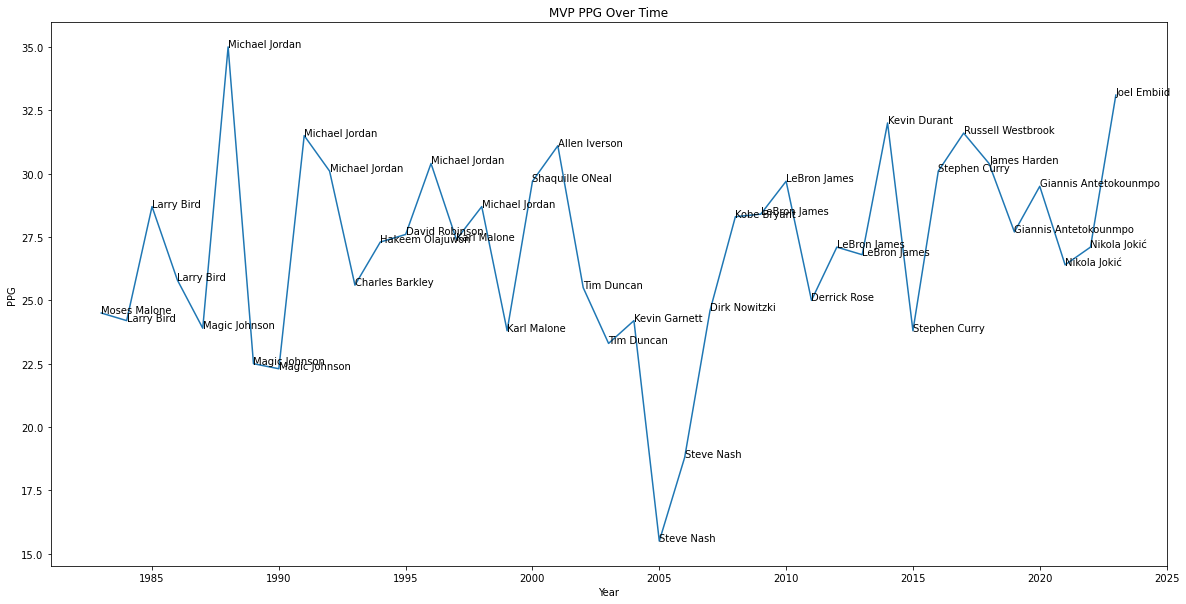

In [569]:
fig, ax = plt.subplots(figsize=(20, 10))
x = df[df['Rank-MVP'] == 1.0]['Yr']
y = df[df['Rank-MVP'] == 1.0]['PTSpergame']
val = df[df['Rank-MVP'] == 1.0]['Player']

plt.plot(x, y)
plt.title('MVP PPG Over Time')
plt.xlabel('Year')
plt.ylabel('PPG')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(x, y, val, ax)

plt.show();

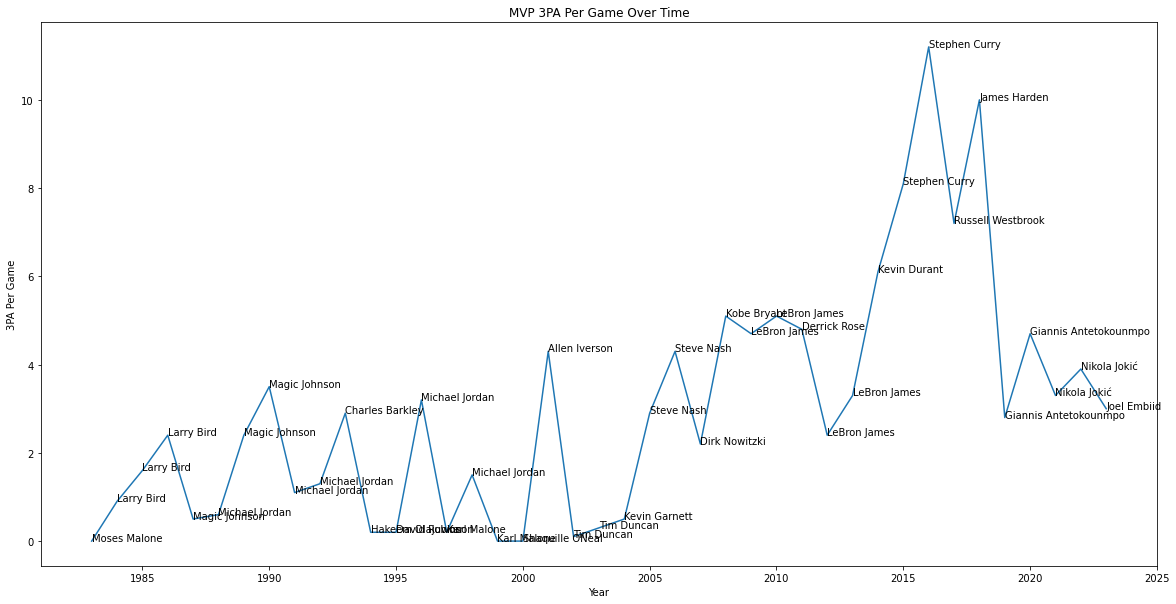

In [570]:
fig, ax = plt.subplots(figsize=(20, 10))
x = df[df['Rank-MVP'] == 1.0]['Yr']
y = df[df['Rank-MVP'] == 1.0]['3PApergame']
val = df[df['Rank-MVP'] == 1.0]['Player']

plt.plot(x, y)
plt.title('MVP 3PA Per Game Over Time')
plt.xlabel('Year')
plt.ylabel('3PA Per Game')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(x, y, val, ax)

plt.show();

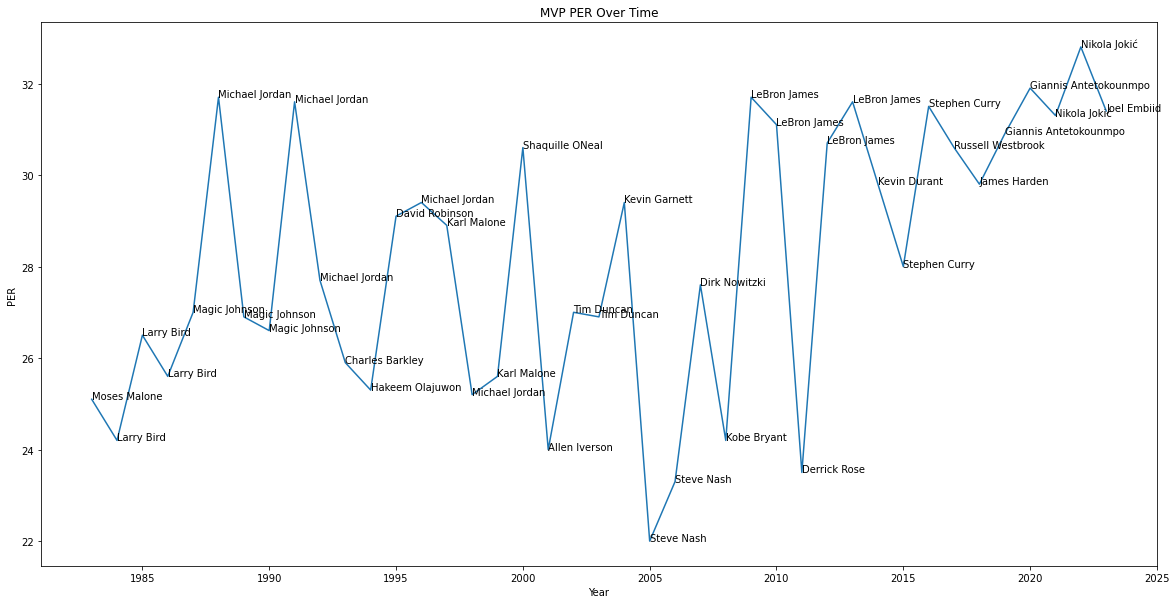

In [571]:
fig, ax = plt.subplots(figsize=(20, 10))
x = df[df['Rank-MVP'] == 1.0]['Yr']
y = df[df['Rank-MVP'] == 1.0]['PER']
val = df[df['Rank-MVP'] == 1.0]['Player']

plt.plot(x, y)
plt.title('MVP PER Over Time')
plt.xlabel('Year')
plt.ylabel('PER')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(x, y, val, ax)

plt.show();

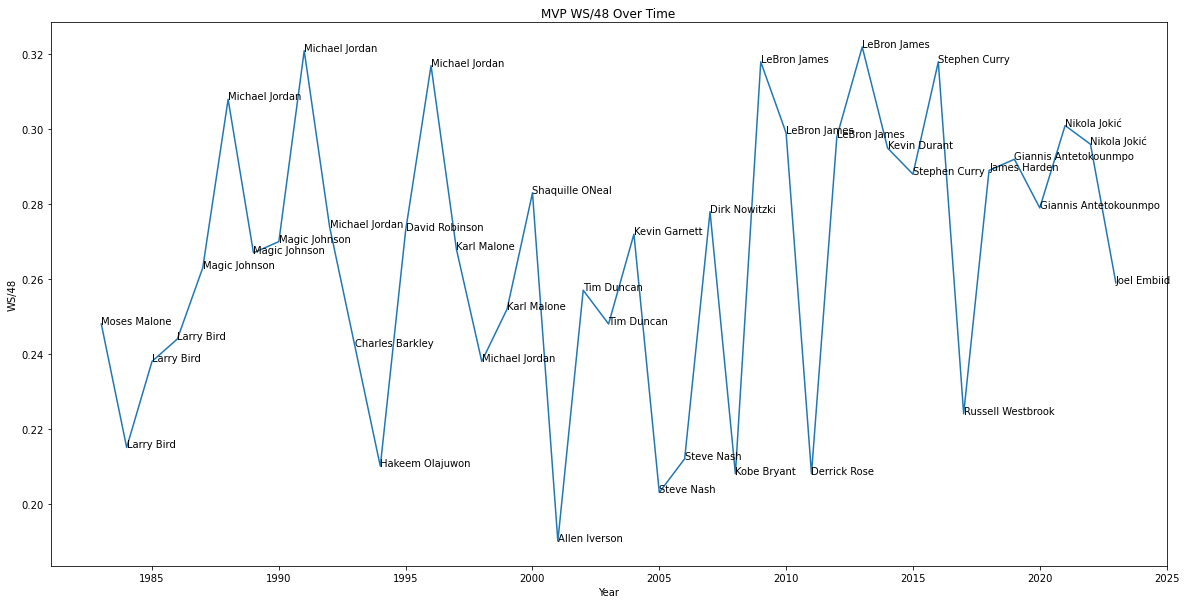

In [572]:
fig, ax = plt.subplots(figsize=(20, 10))
x = df[df['Rank-MVP'] == 1.0]['Yr']
y = df[df['Rank-MVP'] == 1.0]['WS/48']
val = df[df['Rank-MVP'] == 1.0]['Player']

plt.plot(x, y)
plt.title('MVP WS/48 Over Time')
plt.xlabel('Year')
plt.ylabel('WS/48')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(x, y, val, ax)

plt.show();